# Part A

• DOMAIN: Electronics and Telecommunication  
• CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting informative signals.
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various
parameters.  
• DATA DESCRIPTION: The data set contains information on various signal tests performed:  
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

In [12]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats 
import matplotlib.pyplot as plt
from tensorflow import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from sklearn.model_selection import StratifiedKFold
%matplotlib inline
#Test Train Split
from sklearn.model_selection import train_test_split
#Feature Scaling library
from sklearn.preprocessing import StandardScaler
#import pickle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import regularizers, op timizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model    



 1. Data import and Understanding

In [13]:
# Initialize the random number generator
import random
seed = 7
np.random.seed(seed)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [16]:
# read csv file
mydata=pd.read_csv("PartSignal.csv")  

# Display top 5 rows of the dataset
mydata.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

Data analysis & visualisation


In [17]:
# Shape of the data 
mydata.shape

(1599, 12)

In [18]:
# Data type of each attribute 
mydata.info()   # it gives information about the data and data types of each attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All the parameters are floating point and the signal strength is an integer.

Apart from Signal Strength rest all features are floating point.

In [19]:
# Checking the presence of missing values
null_counts = mydata.isnull().sum()  # This prints the columns with the number of null values they have
print (null_counts)

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64


There are no null values in the data



In [21]:
# 5 point summary of numerical attributes
mydata.describe()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000   
mean      8.319637     0.527821     0.270976     2.538806     0.087467   
std       1.741096     0.179060     0.194801     1.409928     0.047065   
min       4.600000     0.120000     0.000000     0.900000     0.012000   
25%       7.100000     0.390000     0.090000     1.900000     0.070000   
50%       7.900000     0.520000     0.260000     2.200000     0.079000   
75%       9.200000     0.640000     0.420000     2.600000     0.090000   
max      15.900000     1.580000     1.000000    15.500000     0.611000   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count  1599.000000  1599.000000  1599.000000  1599.000000   1599.000000   
mean     15.874922    46.467792     0.996747     3.311113      0.658149   
std      10.460157    32.895324     0.001887     0.154386      0.169507   
min       1.000000     6.000000     0.990070     2.740000      0.330000   
25%       7.000000    22.000000     0.995600     3.210000      0.550000   
50%      14.000000    38.000000     0.996750     3.310000      0.620000   
75%      21.000000    62.000000     0.997835     3.400000      0.730000   
max      72.000000   289.000000     1.003690     4.010000      2.000000   

       Parameter 11  Signal_Strength  
count   1599.000000      1599.000000  
mean      10.422983         5.636023  
std        1.065668         0.807569  
min        8.400000         3.000000  
25%        9.500000         5.000000  
50%       10.200000         6.000000  
75%       11.100000         6.000000  
max       14.900000         8.000000

Looking the 11 parameters : Parameter 3 ranges between 0 and 1. Maximum value of Parameter 5 is 0.6 Parameter 8 has a very low range between 0.9 and 1.004 Standard deviation is lowest for Parameter 8, it is 0.001887 'Signal_Strength' has classes as - 3.5, 4.0,5.0, 6.0, 7.0 and 7.5

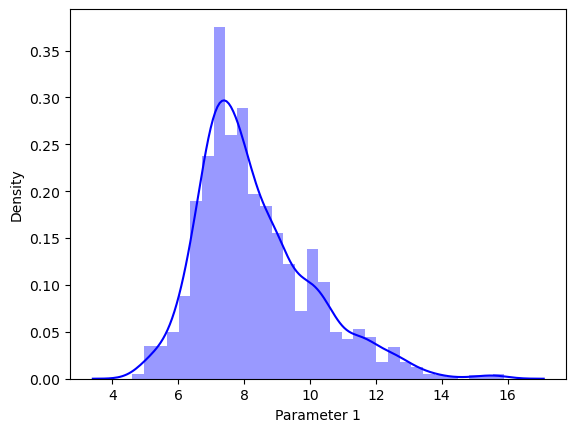

Distribution of  Parameter 1
Mean is: 8.319637273295838
Median is: 7.9
Mode is: 0    7.2
Name: Parameter 1, dtype: float64
Standard deviation is: 1.7410963181277006
Skewness is: 0.9827514413284587
Maximum is: 15.9
Minimum is: 4.6


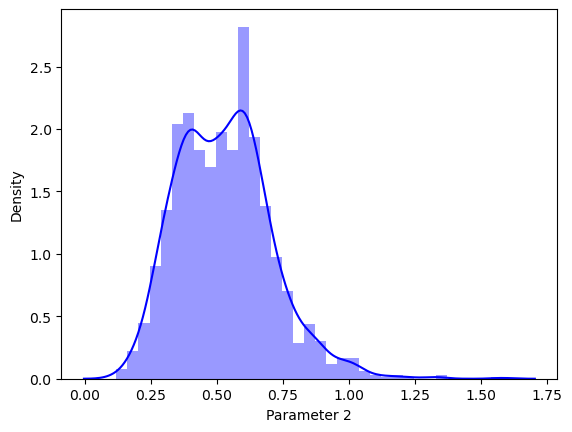

Distribution of  Parameter 2
Mean is: 0.5278205128205131
Median is: 0.52
Mode is: 0    0.6
Name: Parameter 2, dtype: float64
Standard deviation is: 0.17905970415353498
Skewness is: 0.6715925723840199
Maximum is: 1.58
Minimum is: 0.12


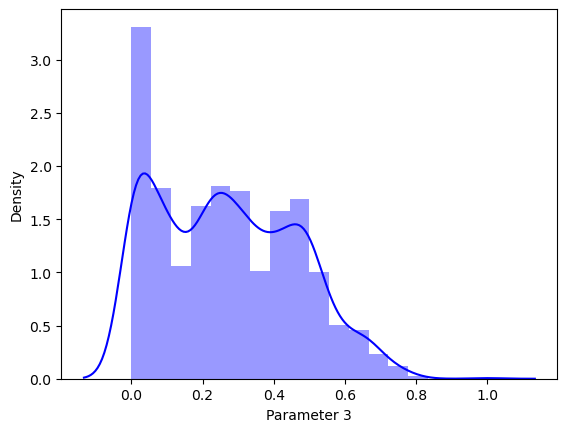

Distribution of  Parameter 3
Mean is: 0.2709756097560964
Median is: 0.26
Mode is: 0    0.0
Name: Parameter 3, dtype: float64
Standard deviation is: 0.19480113740531785
Skewness is: 0.3183372952546368
Maximum is: 1.0
Minimum is: 0.0


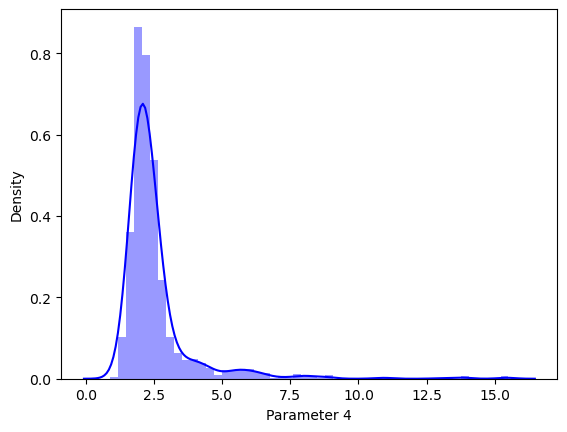

Distribution of  Parameter 4
Mean is: 2.5388055034396517
Median is: 2.2
Mode is: 0    2.0
Name: Parameter 4, dtype: float64
Standard deviation is: 1.4099280595072805
Skewness is: 4.54065542590319
Maximum is: 15.5
Minimum is: 0.9


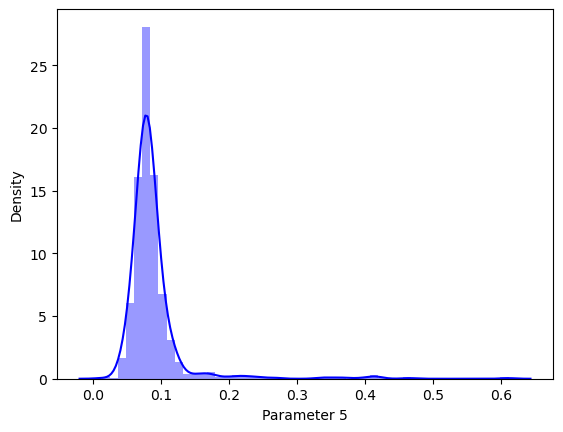

Distribution of  Parameter 5
Mean is: 0.08746654158849257
Median is: 0.079
Mode is: 0    0.08
Name: Parameter 5, dtype: float64
Standard deviation is: 0.047065302010090154
Skewness is: 5.680346571971724
Maximum is: 0.611
Minimum is: 0.012


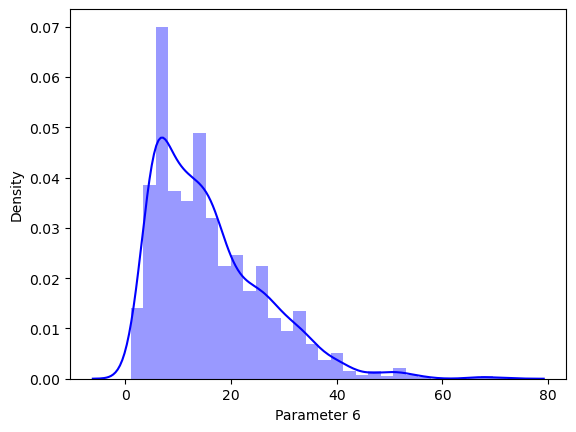

Distribution of  Parameter 6
Mean is: 15.874921826141339
Median is: 14.0
Mode is: 0    6.0
Name: Parameter 6, dtype: float64
Standard deviation is: 10.46015696980973
Skewness is: 1.250567293314441
Maximum is: 72.0
Minimum is: 1.0


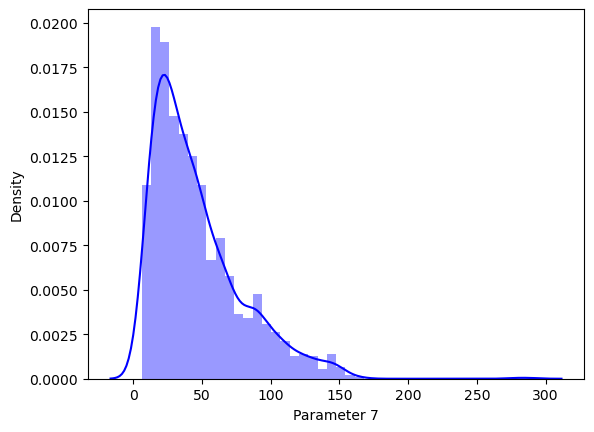

Distribution of  Parameter 7
Mean is: 46.46779237023139
Median is: 38.0
Mode is: 0    28.0
Name: Parameter 7, dtype: float64
Standard deviation is: 32.89532447829901
Skewness is: 1.515531257594554
Maximum is: 289.0
Minimum is: 6.0


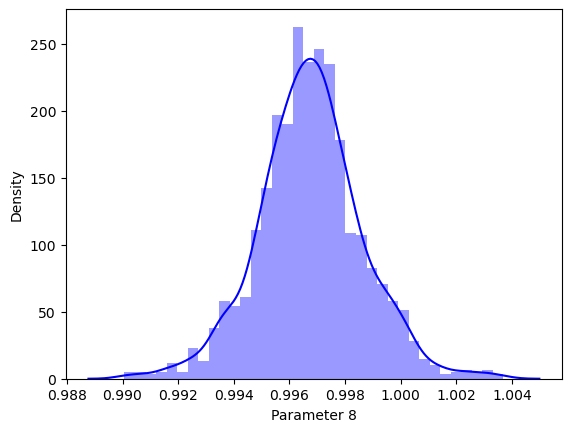

Distribution of  Parameter 8
Mean is: 0.9967466791744831
Median is: 0.99675
Mode is: 0    0.9972
Name: Parameter 8, dtype: float64
Standard deviation is: 0.0018873339538425559
Skewness is: 0.07128766294927483
Maximum is: 1.00369
Minimum is: 0.99007


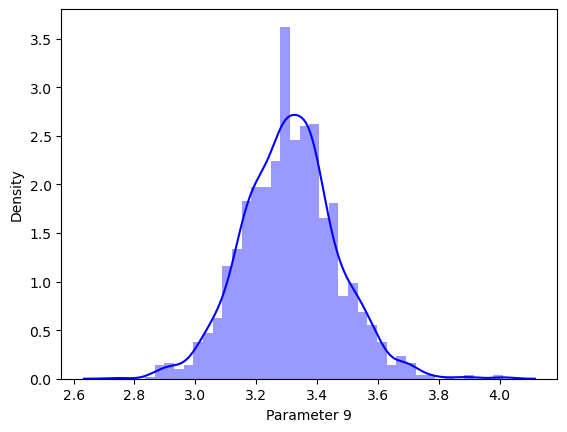

Distribution of  Parameter 9
Mean is: 3.311113195747343
Median is: 3.31
Mode is: 0    3.3
Name: Parameter 9, dtype: float64
Standard deviation is: 0.15438646490354266
Skewness is: 0.19368349811284427
Maximum is: 4.01
Minimum is: 2.74


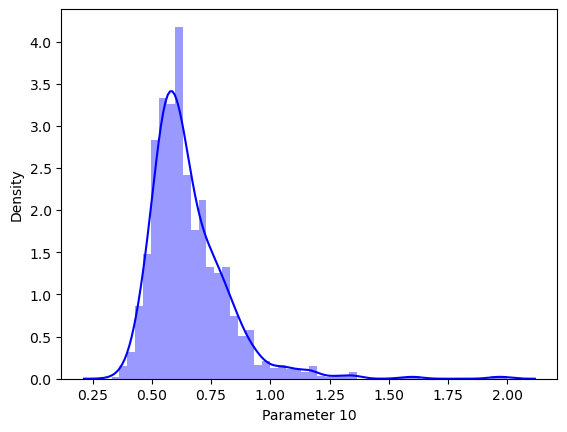

Distribution of  Parameter 10
Mean is: 0.6581488430268921
Median is: 0.62
Mode is: 0    0.6
Name: Parameter 10, dtype: float64
Standard deviation is: 0.16950697959010977
Skewness is: 2.4286723536602945
Maximum is: 2.0
Minimum is: 0.33


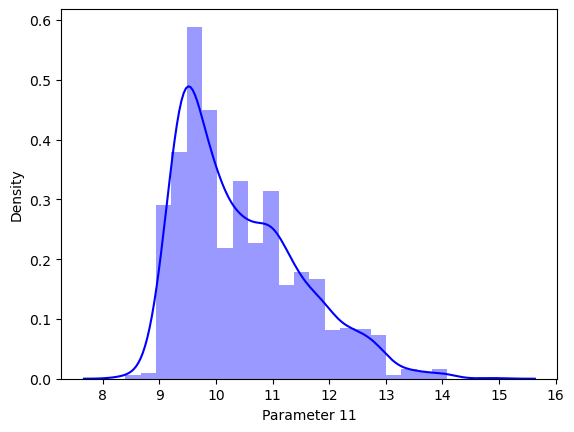

Distribution of  Parameter 11
Mean is: 10.422983114446502
Median is: 10.2
Mode is: 0    9.5
Name: Parameter 11, dtype: float64
Standard deviation is: 1.0656675818563965
Skewness is: 0.8608288069184189
Maximum is: 14.9
Minimum is: 8.4


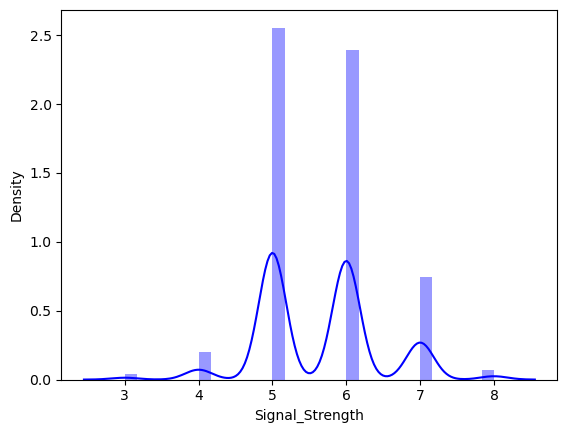

Distribution of  Signal_Strength
Mean is: 5.6360225140712945
Median is: 6.0
Mode is: 0    5
Name: Signal_Strength, dtype: int64
Standard deviation is: 0.8075694397347023
Skewness is: 0.21780157547366327
Maximum is: 8
Minimum is: 3


In [22]:
# studying the distribution of continuous attributes
cols = list(mydata)
for i in np.arange(len(cols)):
    sns.distplot(mydata[cols[i]], color='blue')
    #plt.xlabel('Experience')
    plt.show()
    print('Distribution of ',cols[i])
    print('Mean is:',mydata[cols[i]].mean())
    print('Median is:',mydata[cols[i]].median())
    print('Mode is:',mydata[cols[i]].mode())
    print('Standard deviation is:',mydata[cols[i]].std())
    print('Skewness is:',mydata[cols[i]].skew())
    print('Maximum is:',mydata[cols[i]].max())
    print('Minimum is:',mydata[cols[i]].min())

Mean, median and mode are almost overlapping or too close to each other ecept in Parameter 7 Parameter 3 is trimodal and Signal strength is a classification variable. All of them are positively skewed. Standard deviation is maximum for Parameter7, it is 32.895324478299074



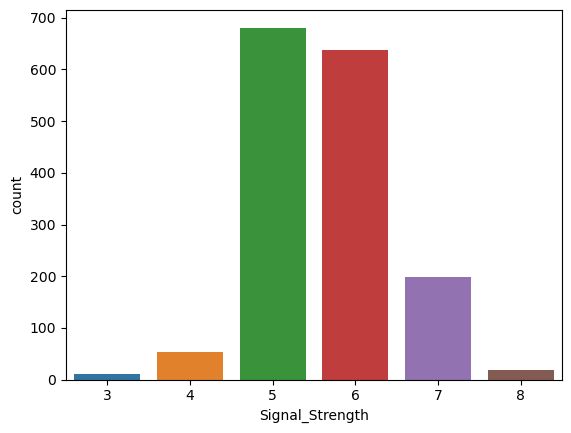

In [23]:
sns.countplot(mydata['Signal_Strength'])    # Distibution of the column 'Signal_Strength'
plt.show()

class 5.0 in 'Signal_Strength' has the highest count.



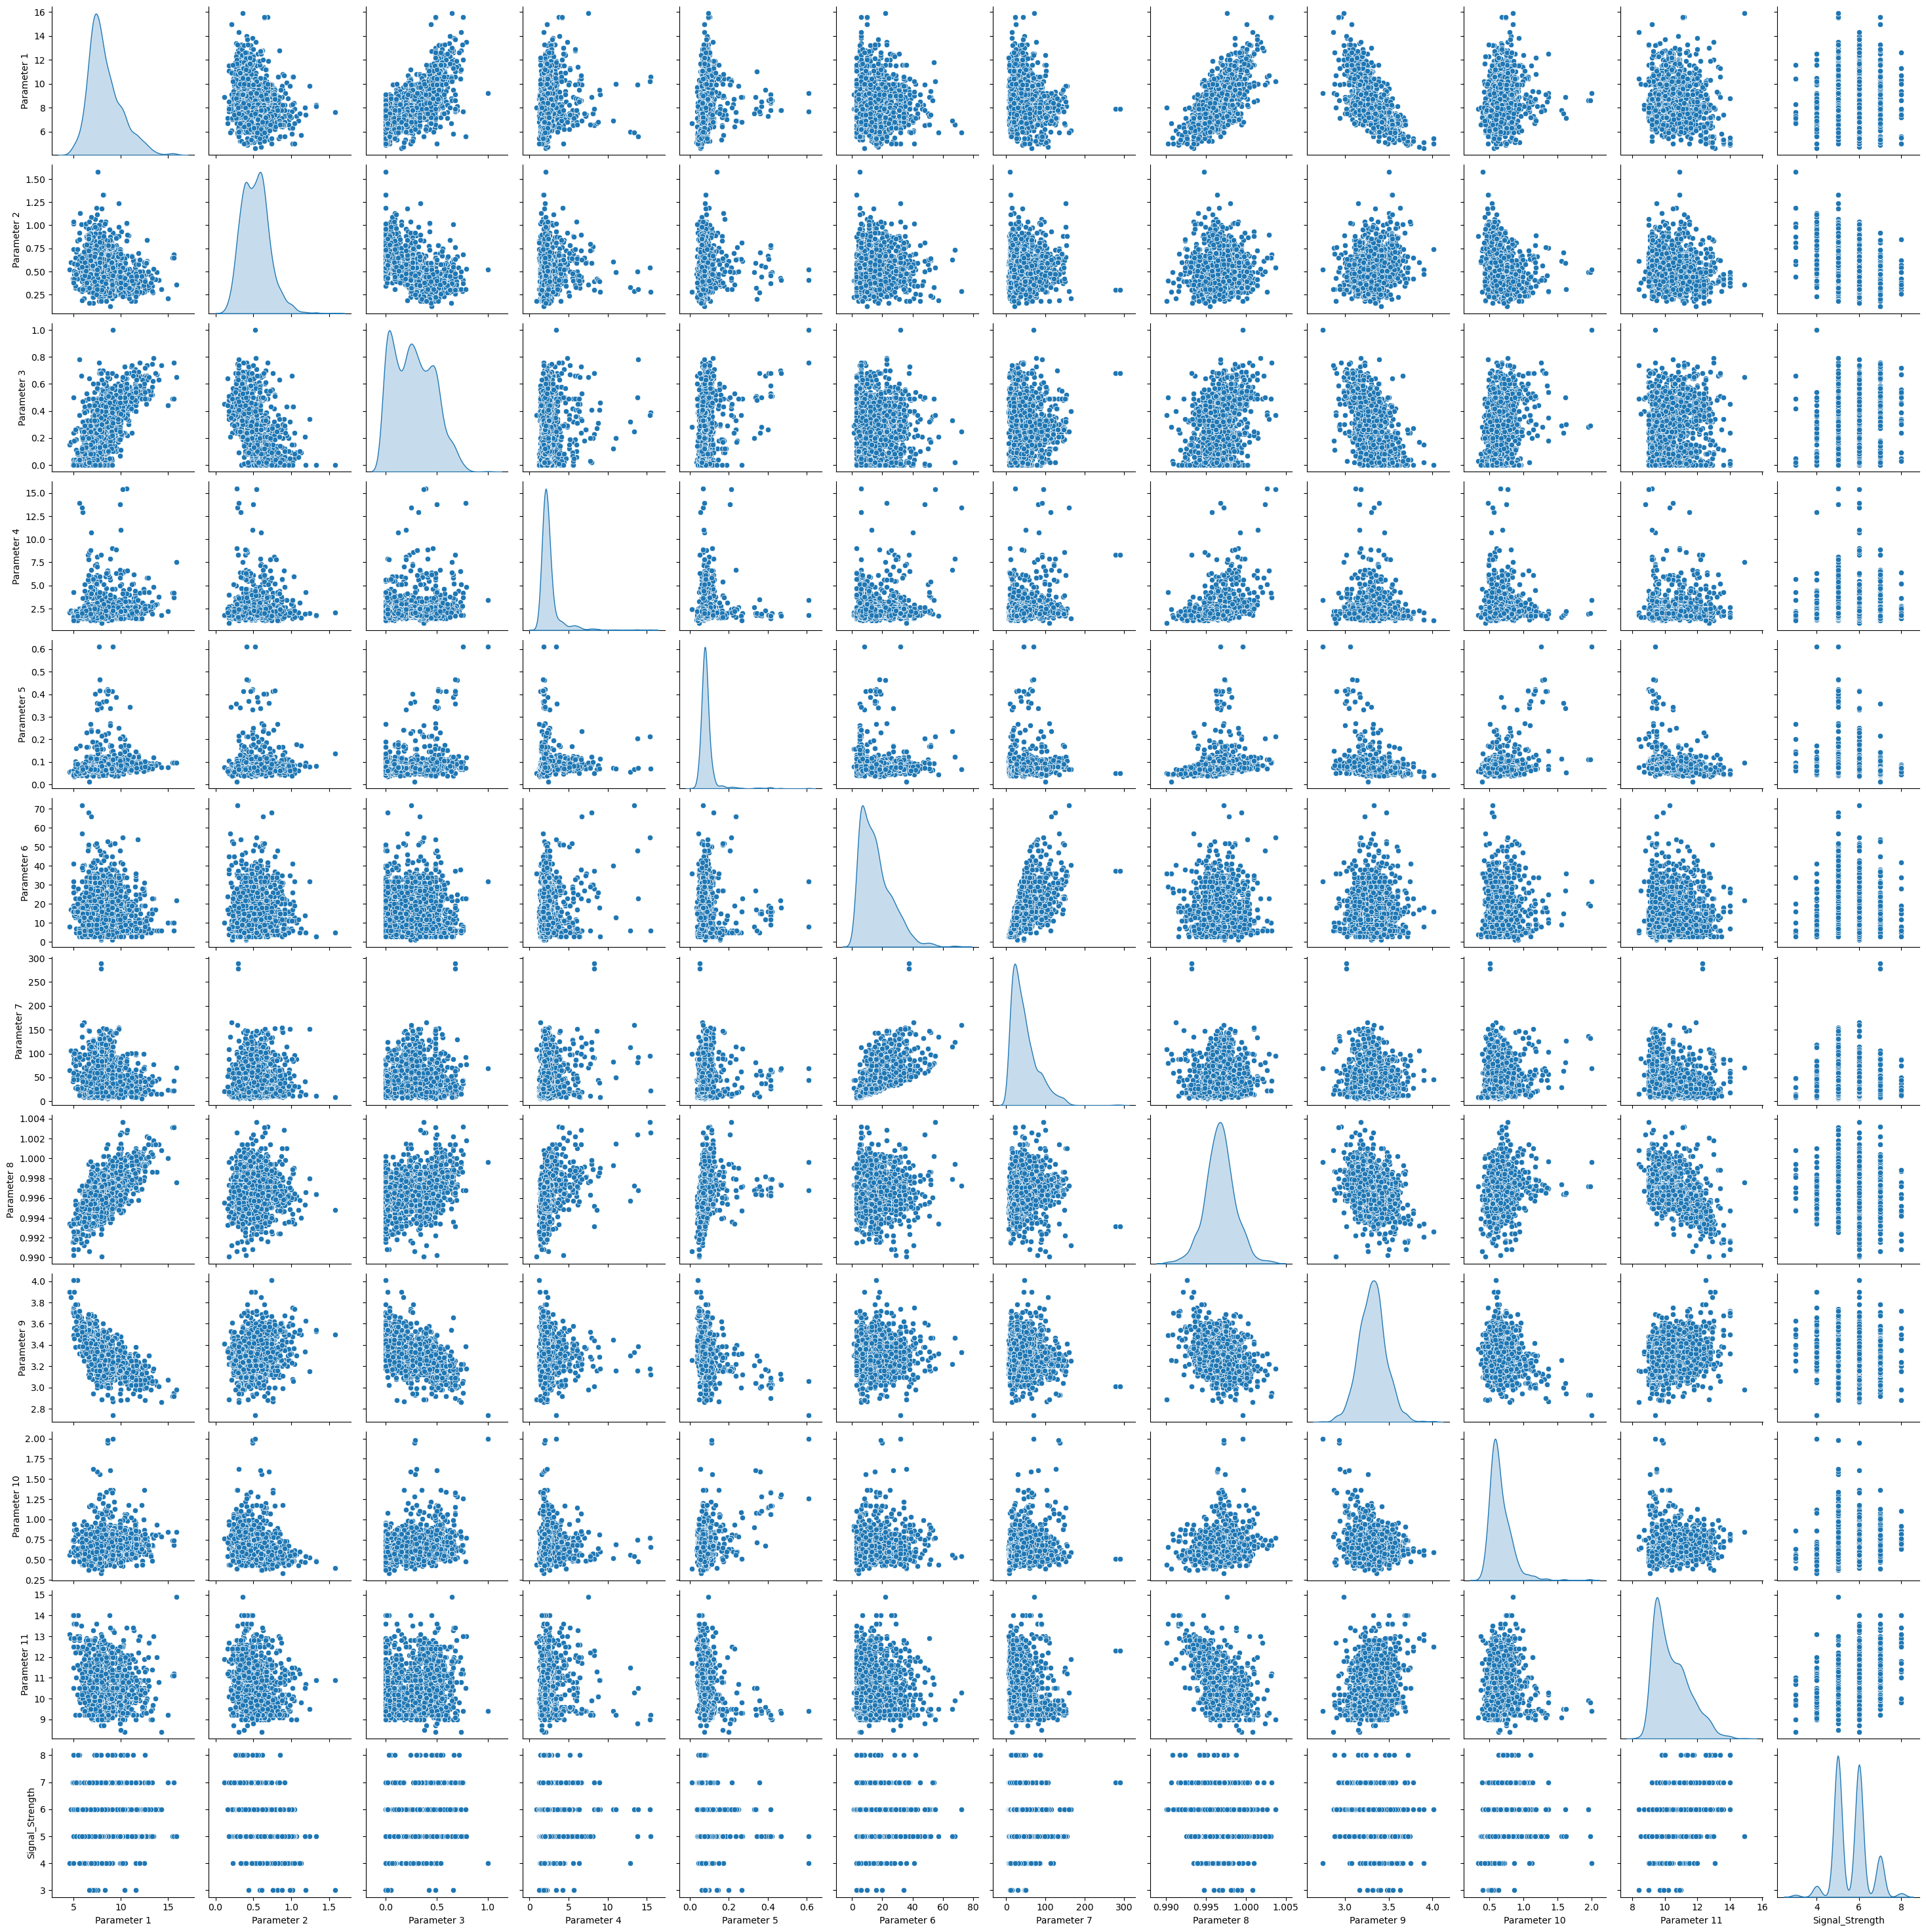

In [24]:
#plt.figure(figsize = (50,50))
sns.pairplot(mydata,diag_kind='kde')
plt.show()

1.Parameter 6 and Parameter 7 are highly correlated with each other and visce versa and they have almost 0 correlation with other Parameters 2.Parameter 1 is positively correlated to Parameter 3 and Parameter 8 and negatively correlated to Parameter 2 and Parameter 9. 3.Parameter 4 is has very low correlation with other Parameters.

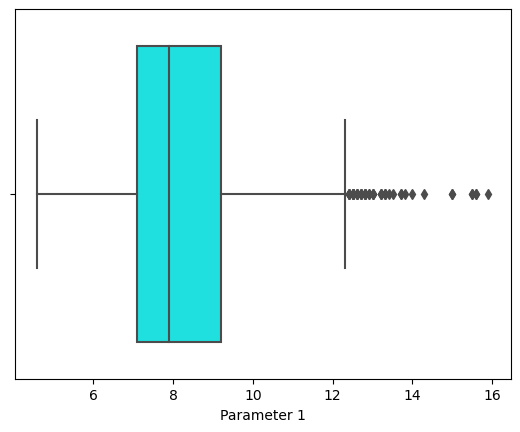

Boxplot of  Parameter 1
Q1 is :  7.1
Q2 is :  7.9
Q3 is :  9.2
IQR is: 2.0999999999999996
Lower Whisker, Upper Whisker :  3.95 , 12.349999999999998
Out of  1599  rows in data, number of outliers are: 49


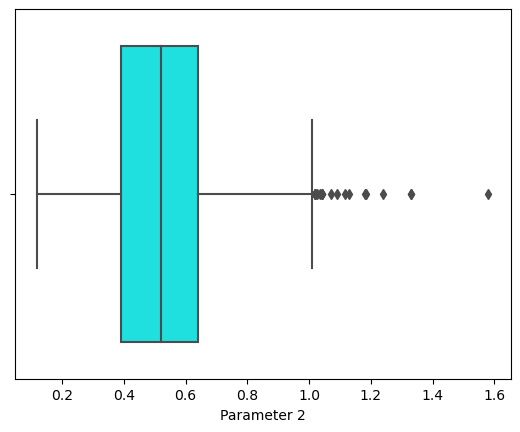

Boxplot of  Parameter 2
Q1 is :  0.39
Q2 is :  0.52
Q3 is :  0.64
IQR is: 0.25
Lower Whisker, Upper Whisker :  0.015000000000000013 , 1.0150000000000001
Out of  1599  rows in data, number of outliers are: 19


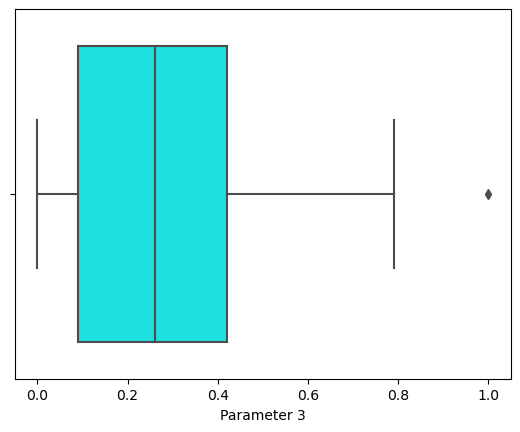

Boxplot of  Parameter 3
Q1 is :  0.09
Q2 is :  0.26
Q3 is :  0.42
IQR is: 0.32999999999999996
Lower Whisker, Upper Whisker :  -0.4049999999999999 , 0.9149999999999999
Out of  1599  rows in data, number of outliers are: 1


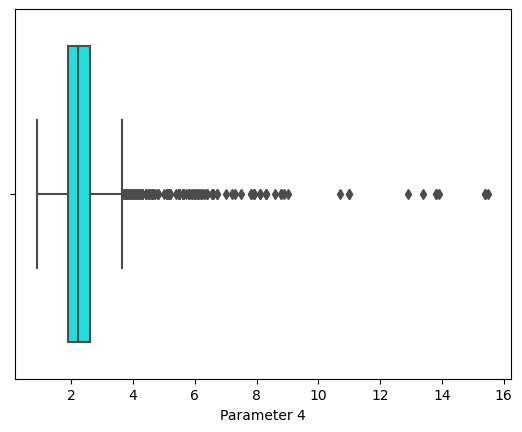

Boxplot of  Parameter 4
Q1 is :  1.9
Q2 is :  2.2
Q3 is :  2.6
IQR is: 0.7000000000000002
Lower Whisker, Upper Whisker :  0.8499999999999996 , 3.6500000000000004
Out of  1599  rows in data, number of outliers are: 155


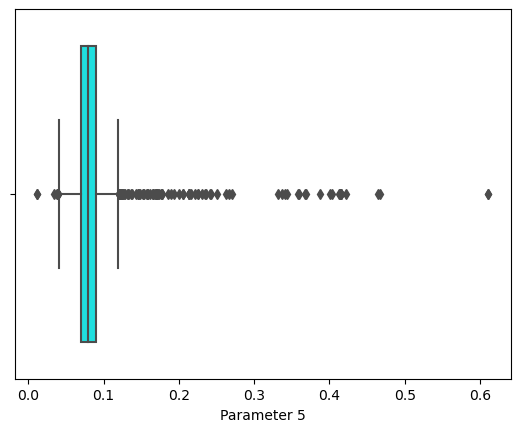

Boxplot of  Parameter 5
Q1 is :  0.07
Q2 is :  0.079
Q3 is :  0.09
IQR is: 0.01999999999999999
Lower Whisker, Upper Whisker :  0.04000000000000002 , 0.11999999999999998
Out of  1599  rows in data, number of outliers are: 112


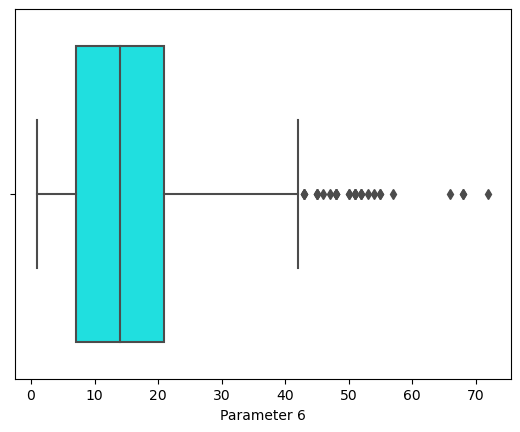

Boxplot of  Parameter 6
Q1 is :  7.0
Q2 is :  14.0
Q3 is :  21.0
IQR is: 14.0
Lower Whisker, Upper Whisker :  -14.0 , 42.0
Out of  1599  rows in data, number of outliers are: 30


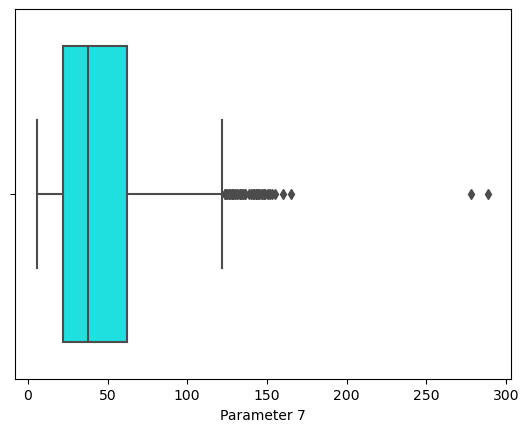

Boxplot of  Parameter 7
Q1 is :  22.0
Q2 is :  38.0
Q3 is :  62.0
IQR is: 40.0
Lower Whisker, Upper Whisker :  -38.0 , 122.0
Out of  1599  rows in data, number of outliers are: 55


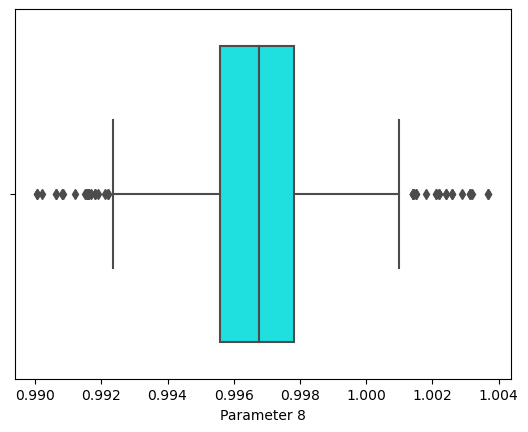

Boxplot of  Parameter 8
Q1 is :  0.9956
Q2 is :  0.99675
Q3 is :  0.997835
IQR is: 0.002234999999999987
Lower Whisker, Upper Whisker :  0.9922475000000001 , 1.0011875
Out of  1599  rows in data, number of outliers are: 45


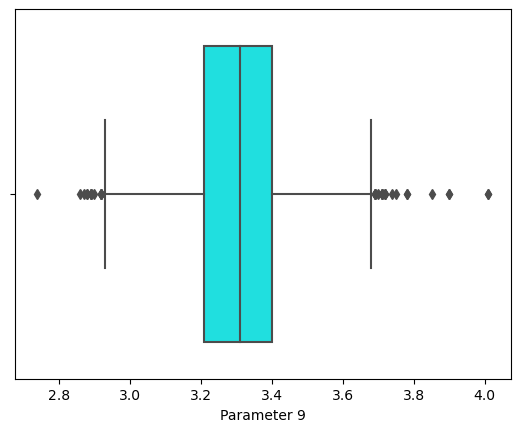

Boxplot of  Parameter 9
Q1 is :  3.21
Q2 is :  3.31
Q3 is :  3.4
IQR is: 0.18999999999999995
Lower Whisker, Upper Whisker :  2.925 , 3.6849999999999996
Out of  1599  rows in data, number of outliers are: 35


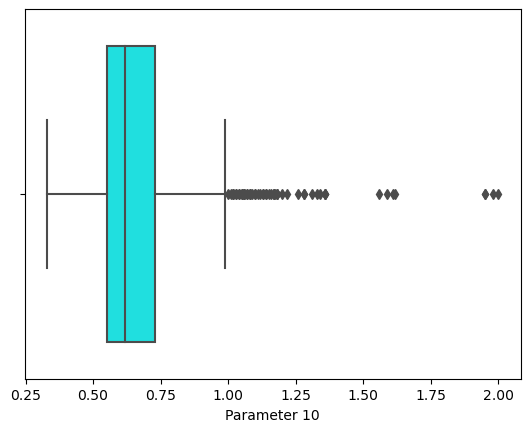

Boxplot of  Parameter 10
Q1 is :  0.55
Q2 is :  0.62
Q3 is :  0.73
IQR is: 0.17999999999999994
Lower Whisker, Upper Whisker :  0.28000000000000014 , 0.9999999999999999
Out of  1599  rows in data, number of outliers are: 59


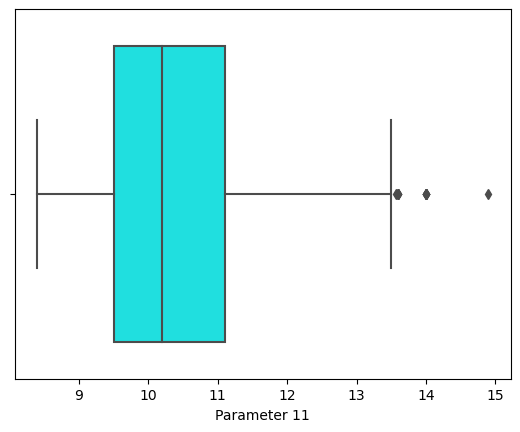

Boxplot of  Parameter 11
Q1 is :  9.5
Q2 is :  10.2
Q3 is :  11.1
IQR is: 1.5999999999999996
Lower Whisker, Upper Whisker :  7.1000000000000005 , 13.5
Out of  1599  rows in data, number of outliers are: 13


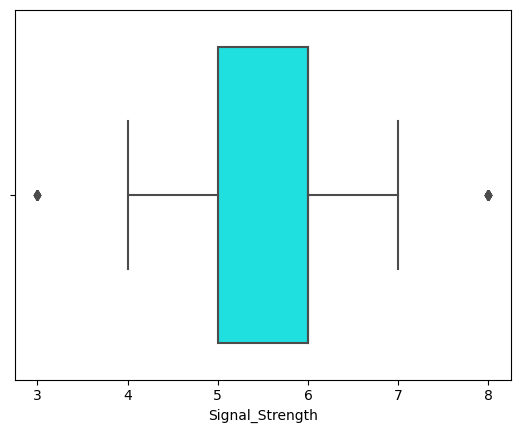

Boxplot of  Signal_Strength
Q1 is :  5.0
Q2 is :  6.0
Q3 is :  6.0
IQR is: 1.0
Lower Whisker, Upper Whisker :  3.5 , 7.5
Out of  1599  rows in data, number of outliers are: 28


In [25]:
# Checking the presence of outliers
l = len(mydata)
col = list(mydata.columns)
#col.remove('condition')
for i in np.arange(len(col)):
    sns.boxplot(x= mydata[col[i]], color='cyan')
    plt.show()
    print('Boxplot of ',col[i])
    #calculating the outiers in attribute 
    Q1 = mydata[col[i]].quantile(0.25)
    Q2 = mydata[col[i]].quantile(0.50)
    Q3 = mydata[col[i]].quantile(0.75) 
    IQR = Q3 - Q1
    L_W = (Q1 - 1.5 *IQR)
    U_W = (Q3 + 1.5 *IQR)    
    print('Q1 is : ',Q1)
    print('Q2 is : ',Q2)
    print('Q3 is : ',Q3)
    print('IQR is:',IQR)
    print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
    bools = (mydata[col[i]] < (Q1 - 1.5 *IQR)) |(mydata[col[i]] > (Q3 + 1.5 * IQR))
    print('Out of ',l,' rows in data, number of outliers are:',bools.sum())   #calculating the number of outliers

Parameter 4 has the highest number of outliers which is 155.



In [26]:
#  function to treat outliers
def detect_treate_outliers(df,operation):
    cols=[]
    IQR_list=[]
    lower_boundary_list=[]
    upper_boundary_list=[]
    outliers_count=[]
    for col in df.columns:
        #print('col',col)
        if((df[col].dtype =='int64' or df[col].dtype =='float64') and (col != 'HR')):
            #print('Inside if')
            IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
            lower_boundary = df[col].quantile(0.25) - (1.5 * IQR)
            upper_boundary = df[col].quantile(0.75) + (1.5 * IQR)
            up_cnt = df[df[col]>upper_boundary][col].shape[0]
            #print('Upper count=',up_cnt)
            lw_cnt = df[df[col]<lower_boundary][col].shape[0]
            #print('lower count=',lw_cnt)
            if(up_cnt+lw_cnt) > 0:
                cols.append(col)
                IQR_list.append(IQR)
                lower_boundary_list.append(lower_boundary)
                upper_boundary_list.append(upper_boundary)
                outliers_count.append(up_cnt+lw_cnt)
                if operation == 'update':
                    df.loc[df[col] > upper_boundary,col] = upper_boundary
                    df.loc[df[col] < lower_boundary,col] = lower_boundary
                else:
                    pass
            else:
                pass
   #print('cols=',cols)
   # print('IQR_list=',IQR_list)
   # print('lower_boundary_list=',lower_boundary_list)
   # print('upper_boundary_list=',upper_boundary_list)
   # print('outliers_count=',outliers_count)
    ndf = pd.DataFrame(list(zip(cols,IQR_list,lower_boundary_list,upper_boundary_list,outliers_count)),columns=['Features','IQR','Lower Boundary','Upper Boundary','Outlier Count'])
    #print('Data=',ndf)
    #print('Columns having outliers=',cols)
    if operation == 'update':
        return (len(cols),df)
    else:
        return (len(cols),ndf)

In [27]:
#Removing outliers by replacing the data below lower whisker with it and above upper whisker with it respectively.
count,df=detect_treate_outliers(mydata,'update')
if count>0:
    print('Updating dataset')
    mydata=df

Updating dataset


<AxesSubplot:>

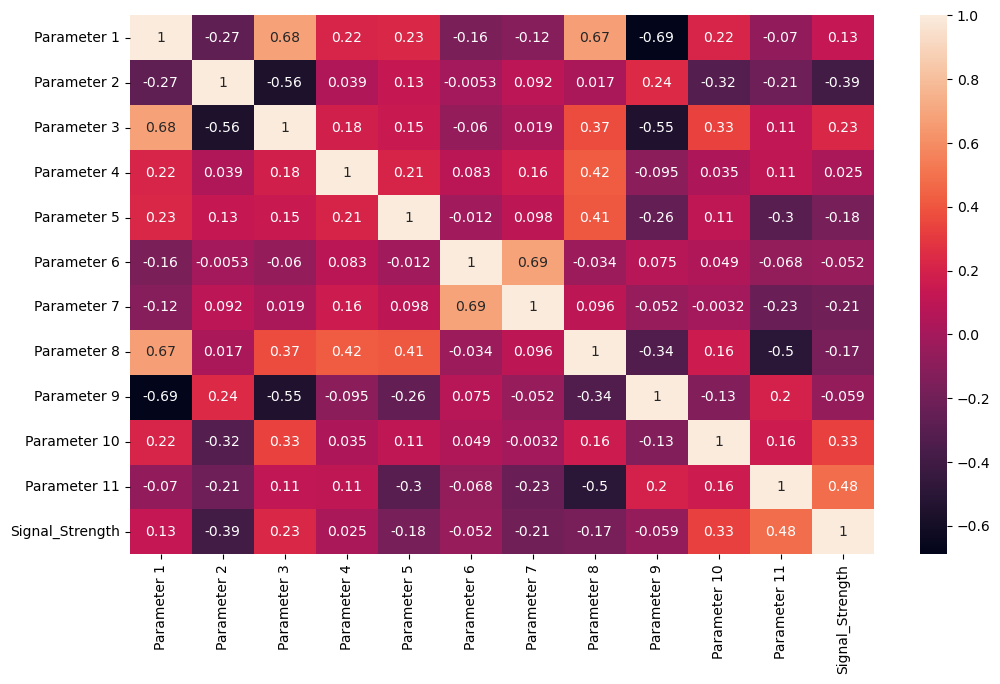

In [28]:
# studying correlation between the attributes
b_corr=mydata.corr()
plt.subplots(figsize =(12, 7)) 
sns.heatmap(b_corr,annot=True)

Since high correlation coefficient value lies between ± 0.50 and ± 1 Parameter 1 is highly correlated with Parameter 3 and Parameter 8, Parameter 9. Parameter 6 and 7 are highly correlated. But since, the correlation is not too high near 0.8 or above not dropping the features.

Design, train, tune and test a neural network regressor.

In [29]:
X = mydata.drop("Signal_Strength", axis=1)
y = mydata['Signal_Strength']

In [30]:
from sklearn.model_selection import train_test_split

# splitting to create test data
X_vtrain, X_test, y_vtrain, y_test = train_test_split(X, y, test_size=.30, random_state=seed)

In [31]:
X_vtrain.shape


(1119, 11)

In [32]:
# splitting to create training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_vtrain, y_vtrain, test_size=.20, random_state=seed)

In [33]:
X_train.shape


(895, 11)

In [34]:
# Initialize Sequential model
model_reg = tf.keras.models.Sequential()

# Normalize input data
model_reg.add(tf.keras.layers.BatchNormalization(input_shape=(11,)))

# Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
model_reg.add(tf.keras.layers.Dense(1))

In [35]:
# Compile the model - add mean squared error as loss and stochastic gradient descent as optimizer
model_reg.compile(optimizer='sgd', loss='mse')

In [36]:
model_reg.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=100, batch_size=10)

Epoch 1/100
90/90 [==============================] - 0s 2ms/step - loss: 4.2097 - val_loss: 3.3021
Epoch 2/100
90/90 [==============================] - 0s 786us/step - loss: 0.9264 - val_loss: 1.2704
Epoch 3/100
90/90 [==============================] - 0s 789us/step - loss: 0.7334 - val_loss: 0.7663
Epoch 4/100
90/90 [==============================] - 0s 792us/step - loss: 0.5899 - val_loss: 0.4451
Epoch 5/100
90/90 [==============================] - 0s 792us/step - loss: 0.5296 - val_loss: 0.3390
Epoch 6/100
90/90 [==============================] - 0s 804us/step - loss: 0.4793 - val_loss: 0.3589
Epoch 7/100
90/90 [==============================] - 0s 785us/step - loss: 0.4926 - val_loss: 0.3299
Epoch 8/100
90/90 [==============================] - 0s 763us/step - loss: 0.4911 - val_loss: 0.3305
Epoch 9/100
90/90 [==============================] - 0s 847us/step - loss: 0.4670 - val_loss: 0.3315
Epoch 10/100
90/90 [==============================] - 0s 844us/step - loss: 0.4664 - val_loss

Pickle the model for future use.


In [37]:
# save the model
model_reg.save("model_reg.h5") #using h5 extension
print("model saved!!!")

model saved!!!


In [38]:
# load the model
model_rr = load_model('model_reg.h5')

error when trying to pickle is - TypeError: cannot pickle 'weakref' object and to resolve 'weakref' object we need to import dill and weakref butit cannot be saved with pickle, so I have used save() to save the model and load_model() to load it.

In [39]:
# Save the Modle to file in the current working directory

#Pkl_Filename = "Pickle_RR_Model.pkl"  
#with open(Pkl_Filename, 'wb') as file:  
#    pickle.dump(model_reg, file)

In [40]:
# Load the Model back from file

#with open(Pkl_Filename, 'rb') as file:  
#    Pickled_RR_Model = pickle.load(file)

#Pickled_RR_Model

In [41]:
y_pred = model_rr.predict(X_test)

In [42]:
print(y_pred[0])
print(y_pred[1])
print(y_pred[2])
print(y_pred[3])
print(y_pred[4])

[5.81087]
[5.8921013]
[6.152836]
[5.508875]
[6.0615234]


In [43]:
print(y_test.head())


1526    6.0
674     6.0
1508    6.0
58      5.0
1351    6.0
Name: Signal_Strength, dtype: float64


The first 5 elements of y_pred and y_test are close.

In [44]:
score_r = r2_score(y_test,y_pred)
print(score_r)

0.2768244181621704


In [45]:
#summary of regression model
model_rr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 11)               44        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 56
Trainable params: 34
Non-trainable params: 22
_________________________________________________________________


The need is to build a classifier which can use these parameters to determine the signal strength or quality 

Steps 1 and 2 are same as for the regressor above

Design, train, tune and test a neural network classifier.

In [47]:
# counting the number of classes in output
mydata['Signal_Strength'].value_counts()

5.0    681
6.0    638
7.0    199
4.0     53
7.5     18
3.5     10
Name: Signal_Strength, dtype: int64

# Model Training & Evaluation using Neural Network to train a classifier

In [48]:
X.shape


(1599, 11)

In [49]:
y.shape


(1599,)

In [50]:
yc = to_categorical(y, num_classes=8)

In [51]:
# splitting data for test of categorial 
Xcv_train, Xc_test, ycv_train, yc_test = train_test_split(X, yc, test_size=.30, random_state=seed)

In [52]:
print("Shape of y_train:", ycv_train.shape)
print("One value of y_train:", ycv_train[0])

Shape of y_train: (1119, 8)
One value of y_train: [0. 0. 0. 0. 0. 0. 0. 1.]


In [53]:
# splitting data for  train and validation of categorial 
Xc_train, Xc_val, yc_train, yc_val = train_test_split(Xcv_train, ycv_train, test_size=.20, random_state=seed)

In [54]:
print("Shape of y_train:", yc_train.shape)
print("One value of y_train:", yc_train[0])

Shape of y_train: (895, 8)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0.]


In [55]:
model_class = Sequential()
model_class.add(Dense(11, activation='relu'))
model_class.add(Dense(8, activation='relu'))
model_class.add(Dense(8, activation='softmax'))

In [56]:
# Compile the model
model_class.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model_class.fit(x=Xc_train, y=yc_train, batch_size=20, epochs=100, validation_data=(Xc_val, yc_val))

Epoch 1/100
45/45 [==============================] - 0s 3ms/step - loss: 2.2498 - accuracy: 0.3330 - val_loss: 1.9743 - val_accuracy: 0.5134
Epoch 2/100
45/45 [==============================] - 0s 982us/step - loss: 1.9310 - accuracy: 0.4503 - val_loss: 1.8608 - val_accuracy: 0.5134
Epoch 3/100
45/45 [==============================] - 0s 935us/step - loss: 1.7944 - accuracy: 0.4659 - val_loss: 1.7492 - val_accuracy: 0.4955
Epoch 4/100
45/45 [==============================] - 0s 996us/step - loss: 1.6702 - accuracy: 0.4737 - val_loss: 1.6036 - val_accuracy: 0.5402
Epoch 5/100
45/45 [==============================] - 0s 935us/step - loss: 1.4860 - accuracy: 0.4436 - val_loss: 1.3546 - val_accuracy: 0.3527
Epoch 6/100
45/45 [==============================] - 0s 960us/step - loss: 1.2666 - accuracy: 0.3866 - val_loss: 1.0943 - val_accuracy: 0.3795
Epoch 7/100
45/45 [==============================] - 0s 997us/step - loss: 1.1846 - accuracy: 0.4302 - val_loss: 1.0526 - val_accuracy: 0.5045
E

Pickle the model for future use.


In [58]:
# save the model
model_class.save("model_class.h5") #using h5 extension
print("model saved!!!")

model saved!!!


In [59]:
# load the model
model_cl = load_model('model_class.h5')

In [60]:
# calculate score of training data
score = model_cl.evaluate(Xc_train, yc_train, verbose=0)
print(score)

[1.064502477645874, 0.5094972252845764]


In [61]:
# score of test data
score_t = model_cl.evaluate(Xc_test, yc_test, verbose=0)
print( score_t)

[1.0749679803848267, 0.518750011920929]


In [62]:
#summary of classification model
model_cl.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 8)                 96        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
Total params: 300
Trainable params: 300
Non-trainable params: 0
_________________________________________________________________


In [64]:
mydata = DB
import sklearn
from sklearn.model_selection import train_test_split

# Independent variables
X=DB.drop('Signal_Strength',axis=1)

# Target variable
Y=DB['Signal_Strength']               

X_Train,X_Test,Y_Train,Y_Test=train_test_split(X, Y, train_size=0.7, random_state=12)

In [65]:
from sklearn.preprocessing import StandardScaler

# Scaling train data
X_Train_S = StandardScaler().fit_transform(X_Train) 

# Scaling test data
X_Test_S = StandardScaler().fit_transform(X_Test)    

In [66]:
# Converting y data into categorical (one-hot encoding)
from keras.utils.np_utils import to_categorical
Y_Train = to_categorical(Y_Train)
Y_Test = to_categorical(Y_Test)

In [67]:
# Confirming Matrix size
print(X_Train_S.shape)
print(X_Test_S.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(1119, 11)
(480, 11)
(1119, 9)
(480, 9)


In [75]:
from keras.models import Sequential # Forward prop
from keras.layers import Dense, Activation, LeakyReLU
from keras import optimizers

In [69]:
NN_model_Classifier = Sequential()

# The Input Layer :
NN_model_Classifier.add(Dense(128, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Classifier.add(Dense(64, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Classifier.add(Dense(32, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))

NN_model_Classifier.add(Dense(16, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Classifier.add(Dense(9, kernel_initializer='normal',activation='softmax'))  # except softmax

# Compile the network :
NN_model_Classifier.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
NN_model_Classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1536      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 9)                

In [70]:
EPOCH=400
Network_Classifier=NN_model_Classifier.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=EPOCH, batch_size=200)


Epoch 1/400
6/6 [==============================] - 0s 18ms/step - loss: 0.1974 - accuracy: 0.3181 - val_loss: 0.1973 - val_accuracy: 0.4042
Epoch 2/400
6/6 [==============================] - 0s 5ms/step - loss: 0.1972 - accuracy: 0.4352 - val_loss: 0.1970 - val_accuracy: 0.4542
Epoch 3/400
6/6 [==============================] - 0s 6ms/step - loss: 0.1969 - accuracy: 0.4173 - val_loss: 0.1965 - val_accuracy: 0.4146
Epoch 4/400
6/6 [==============================] - 0s 5ms/step - loss: 0.1962 - accuracy: 0.3923 - val_loss: 0.1955 - val_accuracy: 0.4146
Epoch 5/400
6/6 [==============================] - 0s 5ms/step - loss: 0.1948 - accuracy: 0.3923 - val_loss: 0.1929 - val_accuracy: 0.4146
Epoch 6/400
6/6 [==============================] - 0s 5ms/step - loss: 0.1913 - accuracy: 0.3923 - val_loss: 0.1863 - val_accuracy: 0.4146
Epoch 7/400
6/6 [==============================] - 0s 5ms/step - loss: 0.1819 - accuracy: 0.3923 - val_loss: 0.1698 - val_accuracy: 0.4146
Epoch 8/400
6/6 [=========

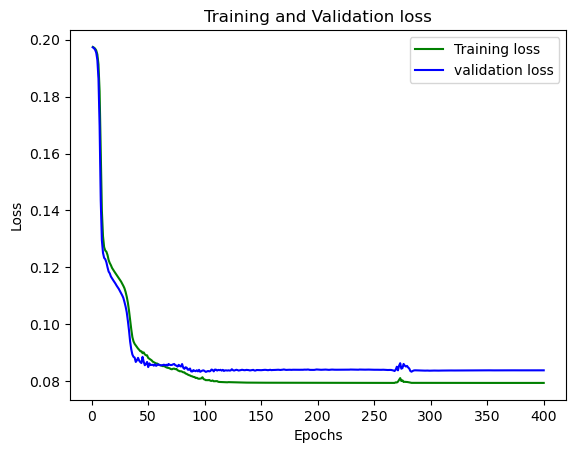

In [71]:
loss_train = Network_Classifier.history['loss']
loss_val = Network_Classifier.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

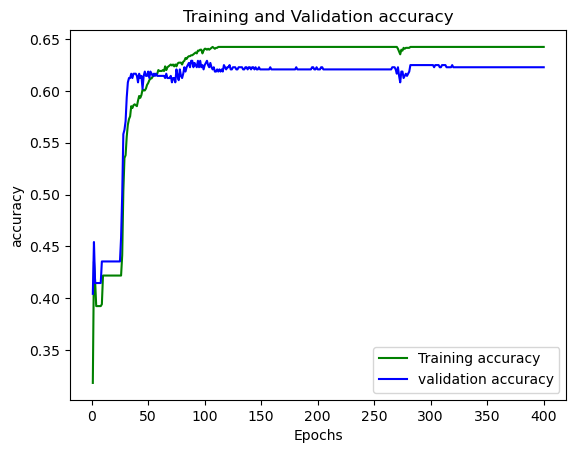

In [77]:
Acc_train = Network_Classifier.history['accuracy']
Acc_val = Network_Classifier.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [78]:
from keras.models import model_from_json
import numpy
import os

# Pickle model to JSON
Classifier_model_json = NN_model_Classifier.to_json()
with open("Classifier_model.json", "w") as json_file:
    json_file.write(Classifier_model_json)
# Pickle weights to HDF5
NN_model_Classifier.save_weights("Classifier_model.h5")
print("Saved model to disk")


# load json and create model
json_file = open('Classifier_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Classifier_model.h5")
print("Loaded model from disk")

# Evaluate
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_Test_S,Y_Test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
accuracy: 62.29%


# Part B 


• DOMAIN: Autonomous Vehicles


• CONTEXT: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map
making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions
of geo-located 360-degree panoramic images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a
known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising
numbers in photographs is a problem of interest to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is
still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large
range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as
by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around
a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler,
it is more complex than MNIST because of the distractors.


In [158]:
# Initialize the random number generator
import random
random.seed(1)
# Import necessary libraries
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# import tensorflow
import tensorflow as tf


In [152]:
# Read in image datafile
f = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', "r")
# List all groups
print(list(f.keys()))


['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [227]:
# Read training, validation and test data in 
X_train, X_val, X_test, y_train, y_val, y_test = np.array(f['X_train']), np.array(f['X_val']), np.array(f['X_test']), np.array(f['y_train']), np.array(f['y_val']), np.array(f['y_test'])


In [228]:
# Check out shapes of data read in
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((42000, 32, 32),
 (60000, 32, 32),
 (18000, 32, 32),
 (42000,),
 (60000,),
 (18000,))

Data Visualization and Preprocessing

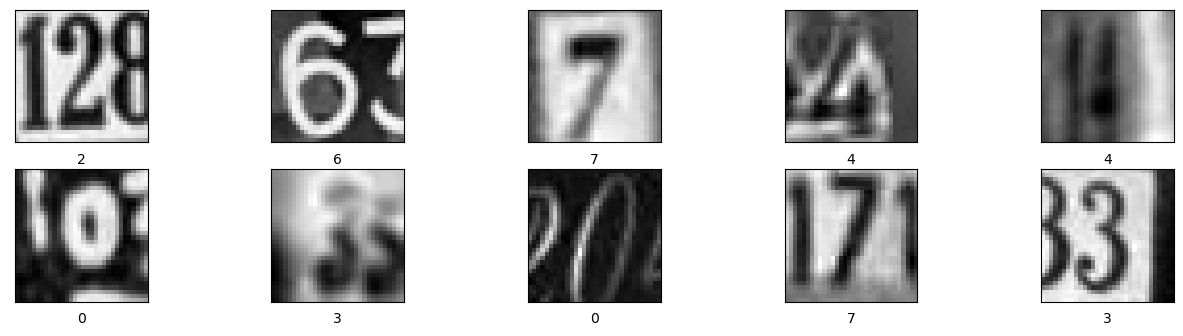

In [229]:
# Display first 10 images from training dataset
plt.figure(figsize=(16,10))
for i in range(10):
 plt.subplot(5,5,i+1)
 plt.grid(False)
 plt.xticks([])
 plt.yticks([])
 plt.imshow(X_train[i], cmap=plt.cm.binary)
 plt.xlabel(y_train[i])
plt.show()

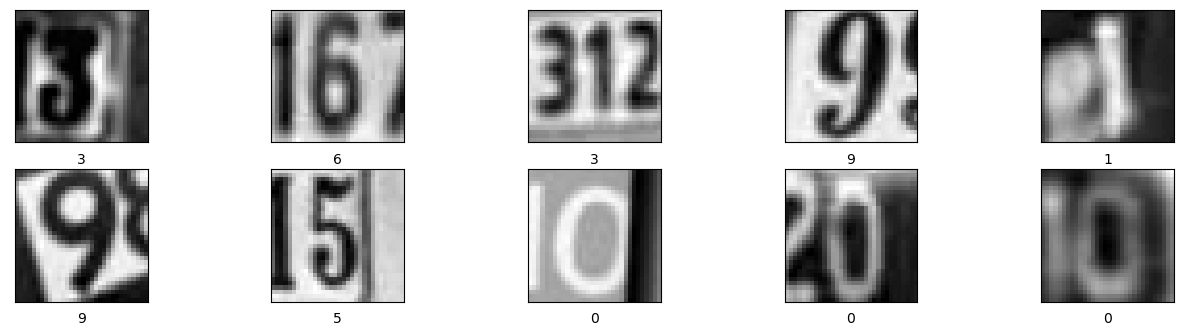

In [230]:
# Display 10 random images from validation dataset
import random
plt.figure(figsize=(16,10))
for i in range(10):
 j = random.randint(0,len(X_val)-1)
 plt.subplot(5,5,i+1)
 plt.grid(False)
 plt.xticks([])
 plt.yticks([])
 plt.imshow(X_val[j], cmap=plt.cm.binary)
 plt.xlabel(y_val[j])
plt.show()

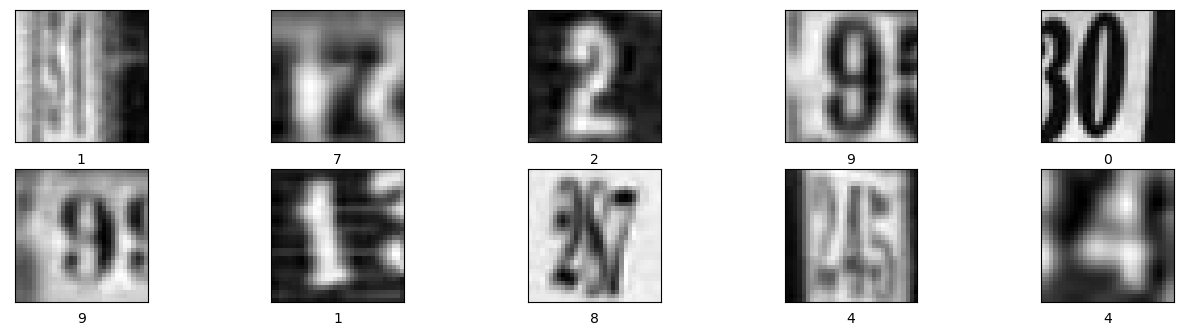

In [231]:
# Display first 10 images from test dataset
plt.figure(figsize=(16,10))
for i in range(10):
 plt.subplot(5,5,i+1)
 plt.grid(False)
 plt.xticks([])
 plt.yticks([])
 plt.imshow(X_test[i], cmap=plt.cm.binary)
 plt.xlabel(y_test[i])
plt.show()

Reshape all the images with appropriate shape update the data in same variable.

In [232]:
print('X_train: (min, max):', (X_train.min(), X_train.max()))
print('X_val: (min, max):', (X_val.min(), X_val.max()))
print('X_test: (min, max):', (X_test.min(), X_test.max()))

X_train: (min, max): (0.0, 254.9745)
X_val: (min, max): (0.0, 254.9745)
X_test: (min, max): (0.0, 254.9745)


• Pixel values (image features) for all the images range between 0 and 254.9745.  
• Pixel values of digital image should always be integer valued and must lie
between 0 and 255  
• It can be inferred that the feature data provided for this classification project
doesn't seem to be raw data - but a processed data  
• We scale features to range between 0 and 1 (Minmax scaling) - this will help
network alogorithm to run more efficiently (for e.g.: learning weights using SGD
algo)  

Normalise the images i.e. Normalise the pixel values.

In [233]:
# Scale feature set
X_train /= 254.9745
X_val /= 254.9745
X_test /= 254.9745

In [234]:
# Look at the unique values target variable takes
print('y_train unique values:', set(y_train))
print('y_val unique values:', set(y_val))
print('y_test unique values:', set(y_test))

y_train unique values: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
y_val unique values: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
y_test unique values: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


• Response variable labels range between 0 and 9 each representing the
prominent digit in an image.  
• We can one-hot-encode it to make each digit a new class variable.  
• We can further build Neural Network classifier on top of it with softmax activation
function in the output layer - so network will calculate probability based numbers
for each class per record to predict class membership.   

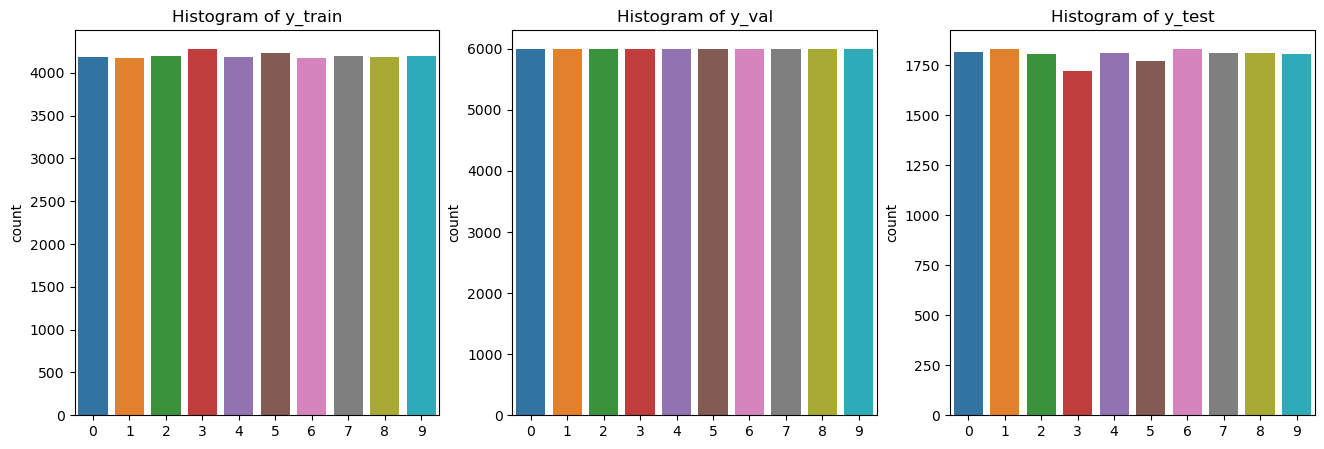

In [235]:
# Let's also take a look at frequency of occurrence of each of the digits in training, validation and test datasets
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
_ = sns.countplot(y_train, ax=ax[0]).set_title("Histogram of y_train")
_ = sns.countplot(y_val, ax=ax[1]).set_title("Histogram of y_val")
_ = sns.countplot(y_test, ax=ax[2]).set_title("Histogram of y_test")

Transform Labels into format acceptable by Neural Network  
• We have nearly equal representation from each of the digit categories for all of
training, validation and test datasets  
• We can infer that the data provided is well balanced   

In [236]:
# One-Hot-Encode target variable
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val_encoded = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=10)

Print total Number of classes in the Dataset.

In [237]:
print("Number of classes:", y_train.shape[1])

IndexError: tuple index out of range

1. Model Training & Evaluation using Neural Network  
A. Design a Neural Network to train a classifier.  
We build a Neural Network based digit classifier¶  
• Since input is a 32 by 32 image (gray scale), we flatten it to make an array of
length 1024  
• Since we are predicting digit in the paradigm of NN classification, and there are
10 digits (0 through 9), we will always have 10 output neurons, with softmax  
(preferably) activation function .. multiclass classification
• Let's start with simple NN having three hidden layers (HL) with 256, 128 and 64
neurons, Leaky ReLU as activation (alpha = 0.3) for each HL without any
regularization (i.e., no dropout rates or no batch normalization)  
• Since SVHN images are bit noisy in nature, we may want to use smaller batch
sizes to make optimizer work better. Let's start with batch size 64 with Adam
optimizer of learning rate 0.03   

In [238]:
# Initialize Neural Network (Sequential) model
model = tf.keras.Sequential()
# Reshape the input of 32 x 32 image into 1d array with 1024 features
model.add(tf.keras.layers.Reshape(target_shape=(1024,), input_shape=(32,32,)))
# Add Layer 1 with 256 neurons and Leaky-ReLU activation function
model.add(tf.keras.layers.Dense(units=256,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL1'))
# Add Layer 2 with 128 neurons and Leaky-ReLU activation function
model.add(tf.keras.layers.Dense(units=128,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL2'))
# Add Layer 3 with 64 neurons and Leaky-ReLU activation function
model.add(tf.keras.layers.Dense(units=64,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL3'))
# Output Layer with 10 neurons and softmax activation function
model.add(tf.keras.layers.Dense(units=10, activation='softmax', name='Output'))


Train the classifier using previously designed Architecture (Use best suitable
parameters).

In [239]:
# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
loss='categorical_crossentropy', metrics=['accuracy'])


In [129]:
# Set early stopping criteria (i.e., no improvement in validation loss in 10 successive epochs)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,
restore_best_weights=True, mode='min')
# Train model
hist = model.fit(X_train, y_train_encoded, batch_size=64, epochs=150, verbose=1,
 validation_data=(X_val, y_val_encoded), callbacks=[callback])


Epoch 1/150
657/657 [==============================] - 2s 3ms/step - loss: 2.2870 - accuracy: 0.1370 - val_loss: 2.0103 - val_accuracy: 0.2511
Epoch 2/150
657/657 [==============================] - 2s 3ms/step - loss: 1.5675 - accuracy: 0.4612 - val_loss: 1.2693 - val_accuracy: 0.5830
Epoch 3/150
657/657 [==============================] - 2s 3ms/step - loss: 1.2523 - accuracy: 0.5999 - val_loss: 1.1971 - val_accuracy: 0.6310
Epoch 4/150
657/657 [==============================] - 2s 2ms/step - loss: 1.1403 - accuracy: 0.6448 - val_loss: 1.0990 - val_accuracy: 0.6530
Epoch 5/150
657/657 [==============================] - 2s 3ms/step - loss: 1.0839 - accuracy: 0.6599 - val_loss: 1.0239 - val_accuracy: 0.6825
Epoch 6/150
657/657 [==============================] - 2s 3ms/step - loss: 1.0117 - accuracy: 0.6859 - val_loss: 0.9791 - val_accuracy: 0.6908
Epoch 7/150
657/657 [==============================] - 2s 3ms/step - loss: 0.9726 - accuracy: 0.7018 - val_loss: 0.9908 - val_accuracy: 0.6929

We can plot the training loss, validation loss vs number of epochs and training
accuracy, validation accuracy vs number of epochs using Matplotlib.

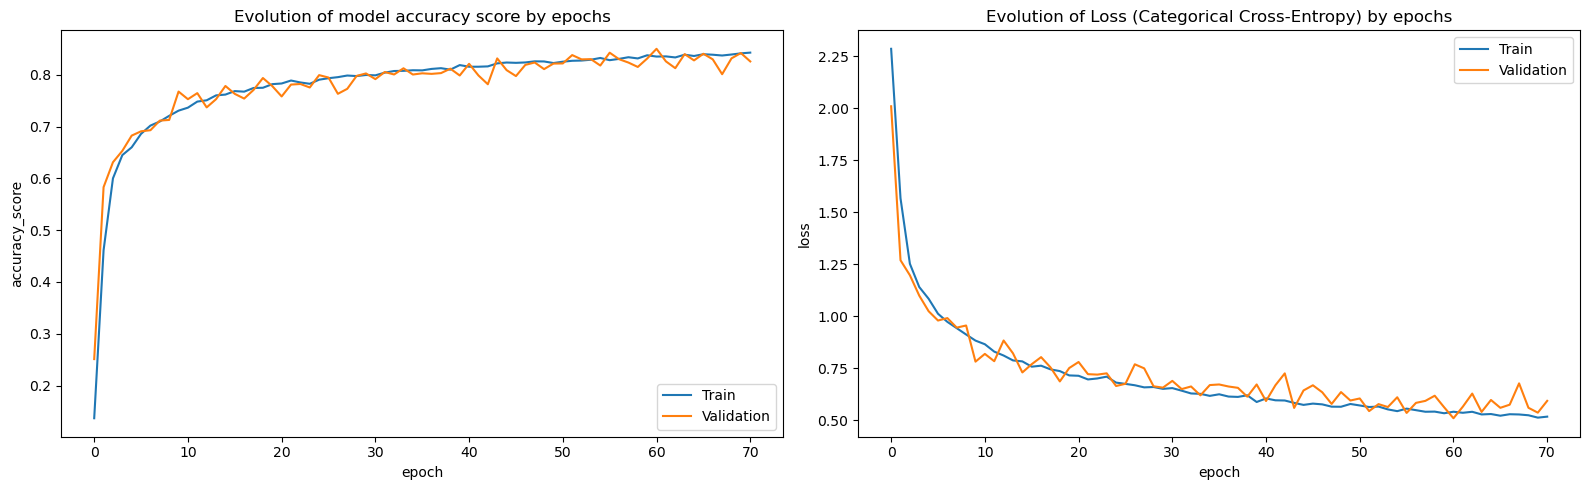

In [240]:
plt.figure(figsize=(16,5))
# History of accuracy score
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Evolution of model accuracy score by epochs')
plt.ylabel('accuracy_score')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
#---------------------------------
# History of Loss
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Evolution of Loss (Categorical Cross-Entropy) by epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()


To evaluate the performance of the model, we will use the evaluate() function, which
returns the loss value and metrics values for the model on the test data.

In [241]:
# Obtain cross-entropy loss and accuracy scores on validation dataset
loss, accuracy = model.evaluate(X_val, y_val_encoded)
print('Validation cross-entropy Loss:', loss)
print('Validation classification Accuracy:', accuracy)


1875/1875 [==============================] - 2s 729us/step - loss: 2.3376 - accuracy: 0.1056
Validation cross-entropy Loss: 2.3376057147979736
Validation classification Accuracy: 0.10563333332538605


In [242]:
# Obtain cross-entropy loss and accuracy scores on test dataset
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print('Test cross-entropy Loss:', loss)
print('Test classification Accuracy:', accuracy)


563/563 [==============================] - 1s 983us/step - loss: 2.3399 - accuracy: 0.1053
Test cross-entropy Loss: 2.3399112224578857
Test classification Accuracy: 0.10527777671813965


As noted above, with batch size of 64 and Adam optimizer with learning rate of   
0.003, we get validation and test accuracies of ~83% and ~81% respectively  
• After around 15 epochs the training and validation accuracy more or less
stabilize and improves gradually  
• There is not much of gap between training and validation curves - hence no clear
evidence of overfit  
• However, loss and accuracy results on validation dataset slightly more volatile vs
training dataset  
• Next I increase hidd en layers to let test accuracy score improve - try to overfit
first and then use regularization   

In [243]:
# Initialize Neural Network (Sequential) model
model2 = tf.keras.Sequential()
# Reshape the input of 32 x 32 image into 1d array with 1024 features
model2.add(tf.keras.layers.Reshape(target_shape=(1024,), input_shape=(32,32,)))
# Add Layer 1 with 256 neurons and Leaky-ReLU activation function
model2.add(tf.keras.layers.Dense(units=256,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL1'))
# Add Layer 2 with 128 neurons and Leaky-ReLU activation function
model2.add(tf.keras.layers.Dense(units=128,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL2'))
# Add Layer 3 with 64 neurons and Leaky-ReLU activation function
model2.add(tf.keras.layers.Dense(units=64,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL3'))
# Add Layer 4 with 32 neurons and Leaky-ReLU activation function
model2.add(tf.keras.layers.Dense(units=32,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL4'))
# Add Layer 5 with 32 neurons and Leaky-ReLU activation function
model2.add(tf.keras.layers.Dense(units=32,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL5'))
# Output Layer with 10 neurons and softmax activation function
model2.add(tf.keras.layers.Dense(units=10, activation='softmax', name='Output'))

In [244]:
# compile model
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
loss='categorical_crossentropy', metrics=['accuracy'])


In [245]:
# Set early stopping criteria (i.e., no improvement in validation loss in 10 successive epochs)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,
restore_best_weights=True, mode='min')

In [246]:
# Train model
hist2 = model2.fit(X_train, y_train_encoded, batch_size=64, epochs=150, verbose=1,
 validation_data=(X_val, y_val_encoded), callbacks=[callback])

Epoch 1/150
657/657 [==============================] - 2s 3ms/step - loss: 2.3136 - accuracy: 0.1011 - val_loss: 2.3124 - val_accuracy: 0.1051
Epoch 2/150
657/657 [==============================] - 2s 3ms/step - loss: 2.2848 - accuracy: 0.1202 - val_loss: 2.2161 - val_accuracy: 0.1408
Epoch 3/150
657/657 [==============================] - 2s 3ms/step - loss: 1.8020 - accuracy: 0.3430 - val_loss: 1.6653 - val_accuracy: 0.4109
Epoch 4/150
657/657 [==============================] - 2s 3ms/step - loss: 1.4341 - accuracy: 0.5068 - val_loss: 1.3010 - val_accuracy: 0.5572
Epoch 5/150
657/657 [==============================] - 2s 3ms/step - loss: 1.2702 - accuracy: 0.5842 - val_loss: 1.1758 - val_accuracy: 0.6202
Epoch 6/150
657/657 [==============================] - 2s 3ms/step - loss: 1.1475 - accuracy: 0.6335 - val_loss: 1.1776 - val_accuracy: 0.6313
Epoch 7/150
657/657 [==============================] - 2s 3ms/step - loss: 1.0584 - accuracy: 0.6647 - val_loss: 0.9900 - val_accuracy: 0.6940

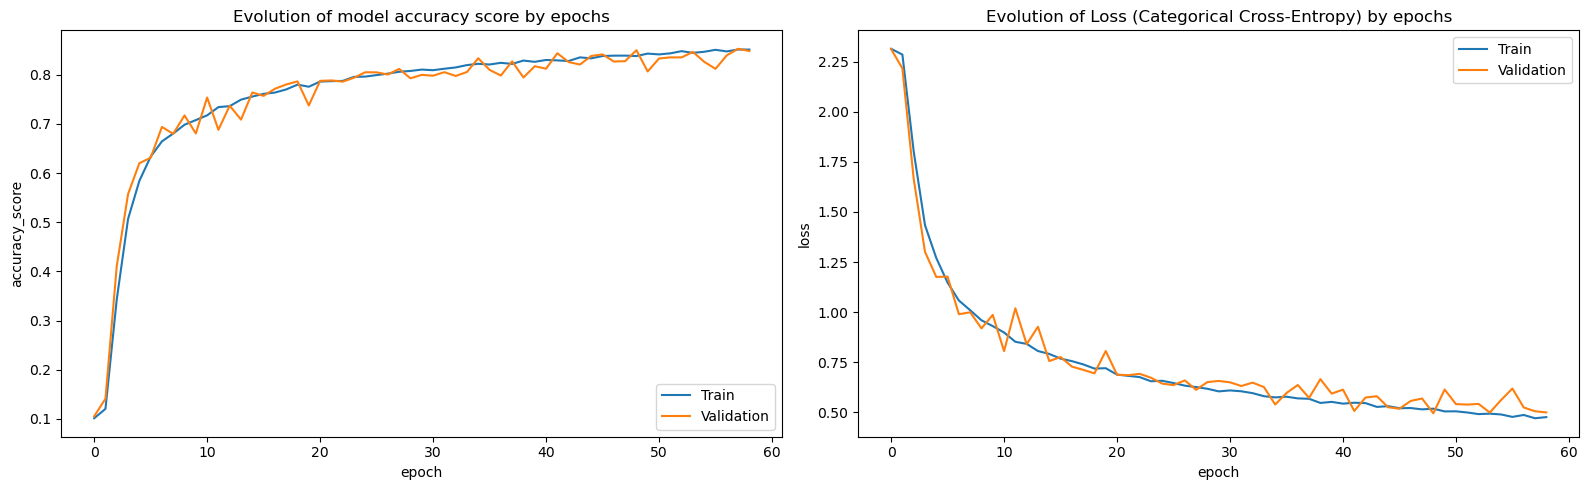

In [247]:
plt.figure(figsize=(16,5))
# History of accuracy score
plt.subplot(1, 2, 1)
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Evolution of model accuracy score by epochs')
plt.ylabel('accuracy_score')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
#---------------------------------
# History of Loss
plt.subplot(1, 2, 2)
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Evolution of Loss (Categorical Cross-Entropy) by epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()

To evaluate the performance of the model, we will use the evaluate() function, which
returns the loss value and metrics values for the model on the test data.


In [248]:
# Obtain cross-entropy loss and accuracy scores on validation dataset
loss, accuracy = model2.evaluate(X_val, y_val_encoded)
print('Validation cross-entropy Loss:', loss)
print('Validation classification Accuracy:', accuracy)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.4960 - accuracy: 0.8502
Validation cross-entropy Loss: 0.4959568679332733
Validation classification Accuracy: 0.8501999974250793


In [249]:
# Obtain cross-entropy loss and accuracy scores on test dataset
loss, accuracy = model2.evaluate(X_test, y_test_encoded)
print('Test cross-entropy Loss:', loss)
print('Test classification Accuracy:', accuracy)

563/563 [==============================] - 0s 749us/step - loss: 0.6140 - accuracy: 0.8272
Test cross-entropy Loss: 0.6139991283416748
Test classification Accuracy: 0.8271666765213013


• With additional hidden layers (5 in all), the both validation accuracy (~86%) and
test accuracy (~83%) improve  
• There seems to have some amount of overfitting sneaking through when I
compare training accuracy vs test accuracy  
• Let's increase the hidden layers (to 7) and also increase batch size to 128  
• Being SVHN data noisy, it is advisable to use smaller batch size - but given the
size of training data (42000), we can increase batch size to 128 to learn better
based on more training data in every epoch   

In [250]:
# Initialize Neural Network (Sequential) model
model3 = tf.keras.Sequential()
# Reshape the input of 32 x 32 image into 1d array with 1024 features
model3.add(tf.keras.layers.Reshape(target_shape=(1024,), input_shape=(32,32,)))
# Add Layer 1 with 256 neurons and Leaky-ReLU activation function
model3.add(tf.keras.layers.Dense(units=256,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL1'))
# Add Layer 2 with 128 neurons and Leaky-ReLU activation function
model3.add(tf.keras.layers.Dense(units=128,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL2'))
# Add Layer 3 with 64 neurons and Leaky-ReLU activation function
model3.add(tf.keras.layers.Dense(units=64,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL3'))
# Add Layer 4 with 32 neurons and Leaky-ReLU activation function
model3.add(tf.keras.layers.Dense(units=64,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL4'))
# Add Layer 5 with 32 neurons and Leaky-ReLU activation function
model3.add(tf.keras.layers.Dense(units=32,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL5'))
# Add Layer 6 with 16 neurons and Leaky-ReLU activation function
model3.add(tf.keras.layers.Dense(units=32,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL6'))
# Add Layer 7 with 32 neurons and Leaky-ReLU activation function
model3.add(tf.keras.layers.Dense(units=32,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL7'))
# Output Layer with 10 neurons and softmax activation function
model3.add(tf.keras.layers.Dense(units=10, activation='softmax', name='Output'))

In [251]:
# compile model
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
loss='categorical_crossentropy', metrics=['accuracy'])

In [253]:
# Set early stopping criteria (i.e., no improvement in validation loss in 10 successive epochs)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,
restore_best_weights=True, mode='min')

In [254]:
# Train model
hist3 = model3.fit(X_train, y_train_encoded, batch_size=128, epochs=150, verbose=1,
 validation_data=(X_val, y_val_encoded), callbacks=[callback])

Epoch 1/150
329/329 [==============================] - 2s 4ms/step - loss: 2.3101 - accuracy: 0.1011 - val_loss: 2.3040 - val_accuracy: 0.0997
Epoch 2/150
329/329 [==============================] - 2s 5ms/step - loss: 2.3050 - accuracy: 0.0983 - val_loss: 2.3012 - val_accuracy: 0.1000
Epoch 3/150
329/329 [==============================] - 1s 4ms/step - loss: 2.3033 - accuracy: 0.1019 - val_loss: 2.3098 - val_accuracy: 0.1012
Epoch 4/150
329/329 [==============================] - 1s 4ms/step - loss: 2.3039 - accuracy: 0.0978 - val_loss: 2.3027 - val_accuracy: 0.1007
Epoch 5/150
329/329 [==============================] - 1s 4ms/step - loss: 2.8177 - accuracy: 0.0999 - val_loss: 2.3076 - val_accuracy: 0.1014
Epoch 6/150
329/329 [==============================] - 1s 4ms/step - loss: 2.3121 - accuracy: 0.1035 - val_loss: 2.3460 - val_accuracy: 0.1000
Epoch 7/150
329/329 [==============================] - 1s 4ms/step - loss: 2.3096 - accuracy: 0.0993 - val_loss: 2.3036 - val_accuracy: 0.1031

We can plot the training loss, validation loss vs number of epochs and training
accuracy, validation accuracy vs number of epochs using Matplotlib.

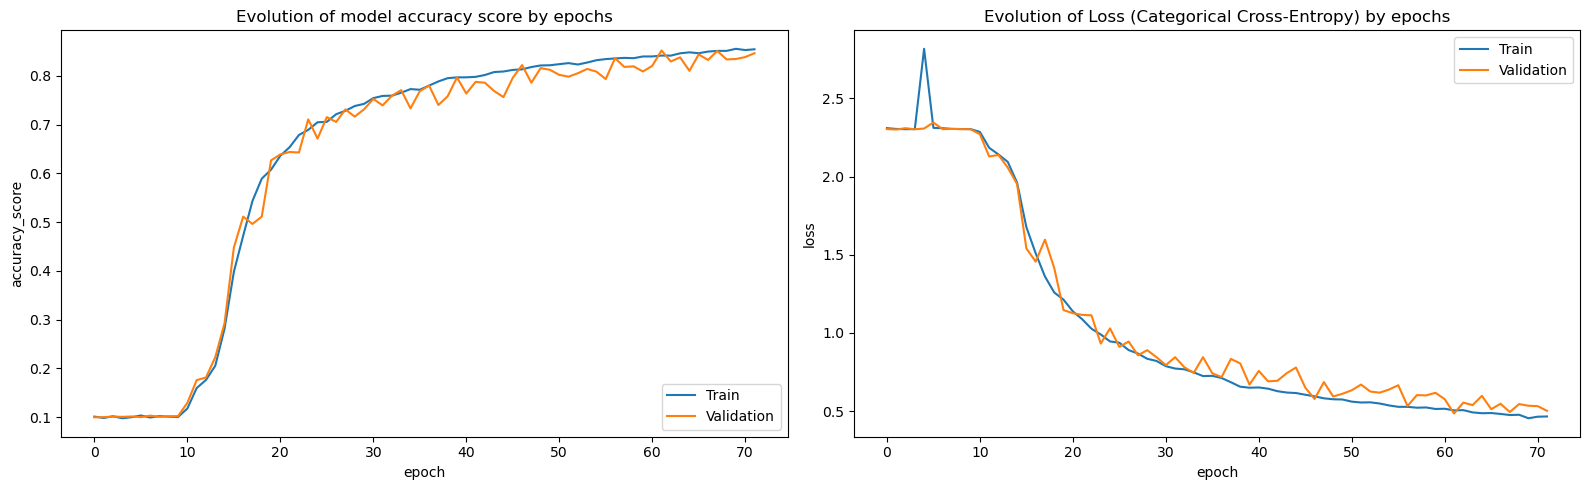

In [255]:
plt.figure(figsize=(16,5))
# History of accuracy score
plt.subplot(1, 2, 1)
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.title('Evolution of model accuracy score by epochs')
plt.ylabel('accuracy_score')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
#---------------------------------
# History of Loss
plt.subplot(1, 2, 2)
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Evolution of Loss (Categorical Cross-Entropy) by epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()


To evaluate the performance of the model, we will use the evaluate() function, which
returns the loss value and metrics values for the model on the test data.

In [256]:
# Obtain cross-entropy loss and accuracy scores on validation dataset
loss, accuracy = model3.evaluate(X_val, y_val_encoded)
print('Validation cross-entropy Loss:', loss)
print('Validation classification Accuracy:', accuracy)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.4841 - accuracy: 0.8521
Validation cross-entropy Loss: 0.484103262424469
Validation classification Accuracy: 0.8520500063896179


In [257]:
# Obtain cross-entropy loss and accuracy scores on test dataset
loss, accuracy = model3.evaluate(X_test, y_test_encoded)
print('Test cross-entropy Loss:', loss)
print('Test classification Accuracy:', accuracy)

563/563 [==============================] - 0s 769us/step - loss: 0.5887 - accuracy: 0.8238
Test cross-entropy Loss: 0.5886817574501038
Test classification Accuracy: 0.8237777948379517


• Based on batch size of 128 and 7 hidden layers, I end up with higher validation
accuracy (~87%) and test accuracy (~84).
• There seems to have certain degree of overfitting
• We can now add dropout layers after hidden layers to regularize the model and
hence helpful in avoiding overfitting
• We can also add batch normalization for further regularization 

In [258]:
# Initialize Neural Network (Sequential) model
model4 = tf.keras.Sequential()
# Reshape the input of 32 x 32 image into 1d array with 1024 features
model4.add(tf.keras.layers.Reshape(target_shape=(1024,), input_shape=(32,32,)))
# Add BatchNormalization layer
model4.add(tf.keras.layers.BatchNormalization())
# Add Layer 1 with 256 neurons and Leaky-ReLU activation function
model4.add(tf.keras.layers.Dense(units=256,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL1'))
# Dropout for regularization to prevent overefitting
model4.add(tf.keras.layers.Dropout(rate=0.20))
# Add Layer 2 with 128 neurons and Leaky-ReLU activation function
model4.add(tf.keras.layers.Dense(units=128,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL2'))
# Dropout for regularization to prevent overefitting
model4.add(tf.keras.layers.Dropout(rate=0.15))
# Add Layer 3 with 64 neurons and Leaky-ReLU activation function
model4.add(tf.keras.layers.Dense(units=64,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL3'))
# Dropout for regularization to prevent overefitting
model4.add(tf.keras.layers.Dropout(rate=0.05))
# Add Layer 4 with 64 neurons and Leaky-ReLU activation function
model4.add(tf.keras.layers.Dense(units=64,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL4'))
# Dropout for regularization to prevent overefitting
model4.add(tf.keras.layers.Dropout(rate=0.05))
# Add Layer 5 with 32 neurons and Leaky-ReLU activation function
model4.add(tf.keras.layers.Dense(units=32,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL5'))
# Dropout for regularization to prevent overefitting
model4.add(tf.keras.layers.Dropout(rate=0.05))
# Add Layer 6 with 32 neurons and Leaky-ReLU activation function
model4.add(tf.keras.layers.Dense(units=32,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL6'))
# Dropout for regularization to prevent overefitting
model4.add(tf.keras.layers.Dropout(rate=0.05))
# Add Layer 7 with 32 neurons and Leaky-ReLU activation function
model4.add(tf.keras.layers.Dense(units=32,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL7'))
# Dropout for regularization to prevent overefitting
model4.add(tf.keras.layers.Dropout(rate=0.05))
# Output Layer with 10 neurons and softmax activation function
model4.add(tf.keras.layers.Dense(units=10, activation='softmax', name='Output'))

In [259]:
# compile model
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
loss='categorical_crossentropy', metrics=['accuracy'])

In [261]:
# Set early stopping criteria (i.e., no improvement in validation loss in 10 successive epochs)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,
restore_best_weights=True, mode='min')

In [262]:
# Train model
hist4 = model4.fit(X_train, y_train_encoded, batch_size=128, epochs=150, verbose=1,
 validation_data=(X_val, y_val_encoded), callbacks=[callback])

Epoch 1/150
329/329 [==============================] - 3s 7ms/step - loss: 1.8339 - accuracy: 0.3361 - val_loss: 1.2870 - val_accuracy: 0.5780
Epoch 2/150
329/329 [==============================] - 2s 7ms/step - loss: 1.3098 - accuracy: 0.5747 - val_loss: 1.0278 - val_accuracy: 0.6729
Epoch 3/150
329/329 [==============================] - 2s 6ms/step - loss: 1.1230 - accuracy: 0.6478 - val_loss: 0.9043 - val_accuracy: 0.7210
Epoch 4/150
329/329 [==============================] - 2s 6ms/step - loss: 1.0180 - accuracy: 0.6829 - val_loss: 0.8161 - val_accuracy: 0.7471
Epoch 5/150
329/329 [==============================] - 2s 6ms/step - loss: 0.9502 - accuracy: 0.7049 - val_loss: 0.7572 - val_accuracy: 0.7677
Epoch 6/150
329/329 [==============================] - 2s 7ms/step - loss: 0.9030 - accuracy: 0.7220 - val_loss: 0.7263 - val_accuracy: 0.7762
Epoch 7/150
329/329 [==============================] - 2s 6ms/step - loss: 0.8683 - accuracy: 0.7342 - val_loss: 0.7134 - val_accuracy: 0.7786

We can plot the training loss, validation loss vs number of epochs and training
accuracy, validation accuracy vs number of epochs using Matplotlib.

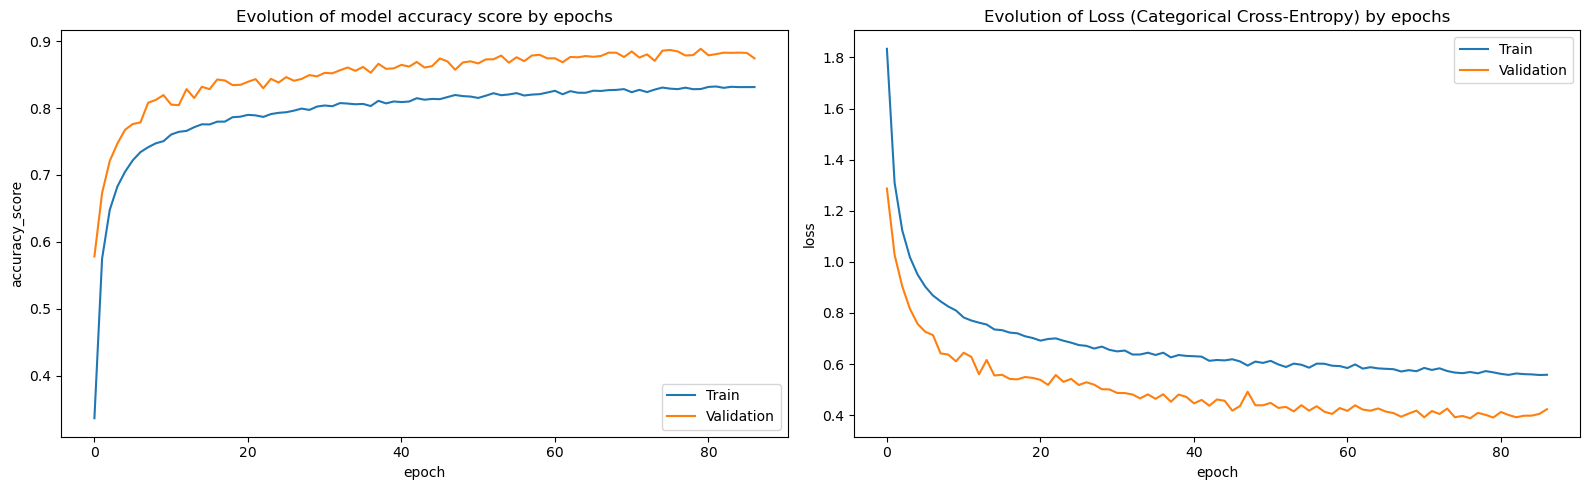

In [263]:
plt.figure(figsize=(16,5))
# History of accuracy score
plt.subplot(1, 2, 1)
plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.title('Evolution of model accuracy score by epochs')
plt.ylabel('accuracy_score')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
#---------------------------------
# History of Loss
plt.subplot(1, 2, 2)
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.title('Evolution of Loss (Categorical Cross-Entropy) by epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()

To evaluate the performance of the model, we will use the evaluate() function, which
returns the loss value and metrics values for the model on the test data

In [264]:
# Obtain cross-entropy loss and accuracy scores on validation dataset
loss, accuracy = model4.evaluate(X_val, y_val_encoded)
print('Validation cross-entropy Loss:', loss)
print('Validation classification Accuracy:', accuracy)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.3880 - accuracy: 0.8848
Validation cross-entropy Loss: 0.3879580497741699
Validation classification Accuracy: 0.8847500085830688


In [265]:
# Obtain cross-entropy loss and accuracy scores on test dataset
loss, accuracy = model4.evaluate(X_test, y_test_encoded)
print('Test cross-entropy Loss:', loss)
print('Test classification Accuracy:', accuracy)

563/563 [==============================] - 0s 856us/step - loss: 0.4742 - accuracy: 0.8624
Test cross-entropy Loss: 0.4742424190044403
Test classification Accuracy: 0.8624444603919983


Adding dropout rates after every hidden layer does improve accuracy for both
validation and test datasets (accuracies ~88% and ~86% respectively)  
• Notably, validation accuracy (loss) is consistently higher (lower) vs training
accuracy (loss). This is somewhat counterintuitive - even if we compare the
results for the cases without any dropout layers  
• However, since we are using dropout layer after every hidden layer, we are
disabling number of neurons past every hidden layer => fraction of info about
each sample/feature is lost, and the subsequent layers attempt to construct
predictions using "incomplete" representations. Thus we are making it artificially
harder for the network to give right answers. Hence lower training accuracy.  
• On the contrary, during validation no dropout layers are considered and all of the
units are available for prediction. Thus the network has "complete" info to predict
class membership => higher validation accuracy  
• Next I include batch normalization after every layer to check if validation and
test accuracy improve further   

In [266]:
# Initialize Neural Network (Sequential) model
model5 = tf.keras.Sequential()
# Reshape the input of 32 x 32 image into 1d array with 1024 features
model5.add(tf.keras.layers.Reshape(target_shape=(1024,), input_shape=(32,32,)))
# Add BatchNormalization layer
model5.add(tf.keras.layers.BatchNormalization())
# Add Layer 1 with 256 neurons and Leaky-ReLU activation function
model5.add(tf.keras.layers.Dense(units=256,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL1'))
# Add BatchNormalization layer
model5.add(tf.keras.layers.BatchNormalization())
# Dropout for regularization to prevent overefitting
model5.add(tf.keras.layers.Dropout(rate=0.20))
# Add Layer 2 with 128 neurons and Leaky-ReLU activation function
model5.add(tf.keras.layers.Dense(units=128,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL2'))
# Add BatchNormalization layer
model5.add(tf.keras.layers.BatchNormalization())
# Dropout for regularization to prevent overefitting
model5.add(tf.keras.layers.Dropout(rate=0.15))
# Add Layer 3 with 64 neurons and Leaky-ReLU activation function
model5.add(tf.keras.layers.Dense(units=64,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL3'))
# Add BatchNormalization layer
model5.add(tf.keras.layers.BatchNormalization())
# Dropout for regularization to prevent overefitting
model5.add(tf.keras.layers.Dropout(rate=0.05))
# Add Layer 4 with 64 neurons and Leaky-ReLU activation function
model5.add(tf.keras.layers.Dense(units=64,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL4'))
# Add BatchNormalization layer
model5.add(tf.keras.layers.BatchNormalization())
# Dropout for regularization to prevent overefitting
model5.add(tf.keras.layers.Dropout(rate=0.05))
# Add Layer 5 with 32 neurons and Leaky-ReLU activation function
model5.add(tf.keras.layers.Dense(units=32,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL5'))
# Add BatchNormalization layer
model5.add(tf.keras.layers.BatchNormalization())
# Dropout for regularization to prevent overefitting
model5.add(tf.keras.layers.Dropout(rate=0.05))
# Add Layer 6 with 32 neurons and Leaky-ReLU activation function
model5.add(tf.keras.layers.Dense(units=32,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL6'))
# Add BatchNormalization layer
model5.add(tf.keras.layers.BatchNormalization())
# Dropout for regularization to prevent overefitting
model5.add(tf.keras.layers.Dropout(rate=0.05))
# Add Layer 7 with 32 neurons and Leaky-ReLU activation function
model5.add(tf.keras.layers.Dense(units=32,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL7'))
# Add BatchNormalization layer
model5.add(tf.keras.layers.BatchNormalization())
# Dropout for regularization to prevent overefitting
model5.add(tf.keras.layers.Dropout(rate=0.05))
# Output Layer with 10 neurons and softmax activation function
model5.add(tf.keras.layers.Dense(units=10, activation='softmax', name='Output'))

In [267]:
# compile model
model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
loss='categorical_crossentropy', metrics=['accuracy'])

In [269]:
# Set early stopping criteria (i.e., no improvement in validation loss in 10 successive epochs)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,
restore_best_weights=True, mode='min')
# Train model
hist5 = model5.fit(X_train, y_train_encoded, batch_size=128, epochs=150, verbose=1,
 validation_data=(X_val, y_val_encoded), callbacks=[callback])

Epoch 1/150
329/329 [==============================] - 4s 8ms/step - loss: 1.7608 - accuracy: 0.3806 - val_loss: 1.2507 - val_accuracy: 0.5961
Epoch 2/150
329/329 [==============================] - 3s 8ms/step - loss: 1.3056 - accuracy: 0.5760 - val_loss: 1.0130 - val_accuracy: 0.6798
Epoch 3/150
329/329 [==============================] - 3s 8ms/step - loss: 1.1482 - accuracy: 0.6378 - val_loss: 0.9924 - val_accuracy: 0.6896
Epoch 4/150
329/329 [==============================] - 3s 9ms/step - loss: 1.0614 - accuracy: 0.6699 - val_loss: 0.8427 - val_accuracy: 0.7340
Epoch 5/150
329/329 [==============================] - 3s 8ms/step - loss: 0.9952 - accuracy: 0.6913 - val_loss: 0.7786 - val_accuracy: 0.7594
Epoch 6/150
329/329 [==============================] - 3s 8ms/step - loss: 0.9462 - accuracy: 0.7059 - val_loss: 0.7583 - val_accuracy: 0.7644
Epoch 7/150
329/329 [==============================] - 2s 7ms/step - loss: 0.9012 - accuracy: 0.7210 - val_loss: 0.6971 - val_accuracy: 0.7844

We can plot the training loss, validation loss vs number of epochs and training
accuracy, validation accuracy vs number of epochs using Matplotlib.


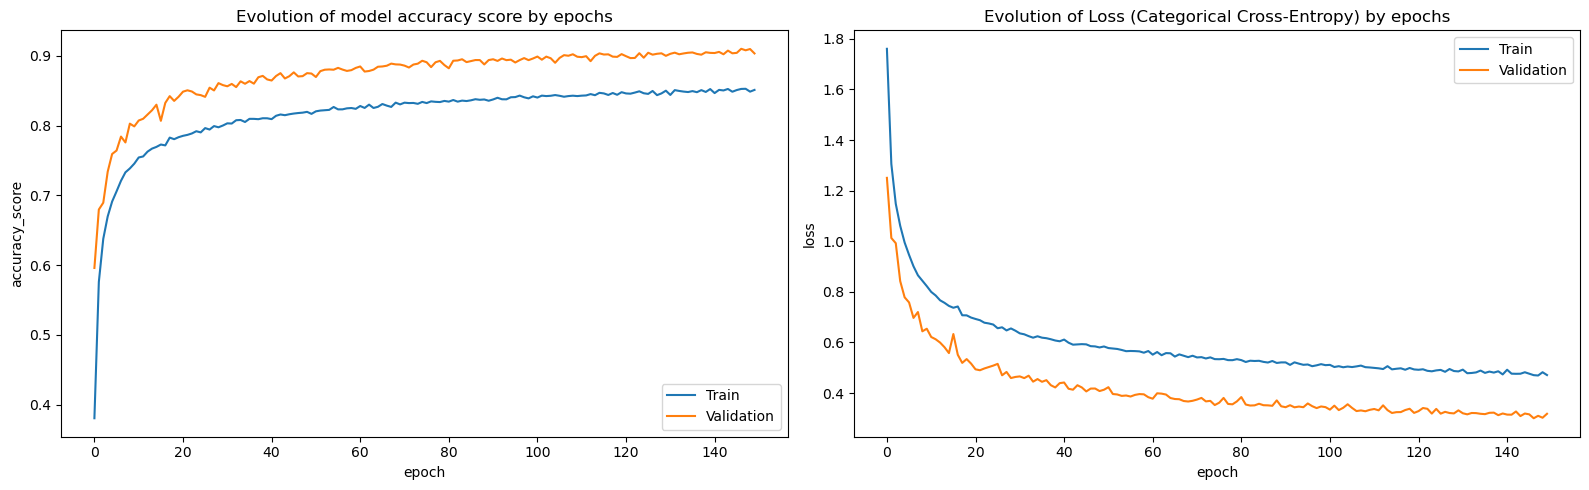

In [270]:
plt.figure(figsize=(16,5))
# History of accuracy score
plt.subplot(1, 2, 1)
plt.plot(hist5.history['accuracy'])
plt.plot(hist5.history['val_accuracy'])
plt.title('Evolution of model accuracy score by epochs')
plt.ylabel('accuracy_score')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
#---------------------------------
# History of Loss
plt.subplot(1, 2, 2)
plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
plt.title('Evolution of Loss (Categorical Cross-Entropy) by epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()

To evaluate the performance of the model, we will use the evaluate() function, which
returns the loss value and metrics values for the model on the test data.

In [271]:
# Obtain cross-entropy loss and accuracy scores on validation dataset
loss, accuracy = model5.evaluate(X_val, y_val_encoded)
print('Validation cross-entropy Loss:', loss)
print('Validation classification Accuracy:', accuracy)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3181 - accuracy: 0.9036
Validation cross-entropy Loss: 0.318147212266922
Validation classification Accuracy: 0.9035500288009644


In [272]:
# Obtain cross-entropy loss and accuracy scores on test dataset
loss, accuracy = model5.evaluate(X_test, y_test_encoded)
print('Test cross-entropy Loss:', loss)
print('Test classification Accuracy:', accuracy)

563/563 [==============================] - 1s 976us/step - loss: 0.4242 - accuracy: 0.8714
Test cross-entropy Loss: 0.42421963810920715
Test classification Accuracy: 0.8713889122009277


• The above results presented clearly has the best validation and test accuracy
scores as yet
• Validation accuracy and Test accuracy are 90%+ and 87%+ respectively
• As noted in the earlier iteration too, validation accuracy (loss) is consistently
higher (lower) vs training accuracy (loss) here attributed mainly due to dropout
layer invoked after every hidden layer
• Now that we already have regularization parameters, let's consider a simpler
model from parsimonious point of view
• So I keep first three hidden layers, fine-tune the learning rate (to 0.0025) for
Adam optimizer and increase epochs to 200 further keeping an early stopping
rule of no improvement in validation loss in 10 successive epochs 

In [273]:
# Initialize Neural Network (Sequential) model
model6 = tf.keras.Sequential()
# Reshape the input of 32 x 32 image into 1d array with 1024 features
model6.add(tf.keras.layers.Reshape(target_shape=(1024,), input_shape=(32,32,)))
# Add BatchNormalization layer
model6.add(tf.keras.layers.BatchNormalization())
# Add Layer 1 with 256 neurons and Leaky-ReLU activation function
model6.add(tf.keras.layers.Dense(units=256,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL1'))
# Add BatchNormalization layer
model6.add(tf.keras.layers.BatchNormalization())
# Dropout for regularization to prevent overefitting
model6.add(tf.keras.layers.Dropout(rate=0.20))
# Add Layer 2 with 128 neurons and Leaky-ReLU activation function
model6.add(tf.keras.layers.Dense(units=128,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL2'))
# Add BatchNormalization layer
model6.add(tf.keras.layers.BatchNormalization())
# Dropout for regularization to prevent overefitting
model6.add(tf.keras.layers.Dropout(rate=0.10))
# Add Layer 3 with 64 neurons and Leaky-ReLU activation function
model6.add(tf.keras.layers.Dense(units=64,
kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7),
 activation=tf.keras.layers.LeakyReLU(alpha=0.3),
name='HL3'))
# Add BatchNormalization layer
model6.add(tf.keras.layers.BatchNormalization())
# Dropout for regularization to prevent overefitting
model6.add(tf.keras.layers.Dropout(rate=0.05))
# Output Layer with 10 neurons and softmax activation function
model6.add(tf.keras.layers.Dense(units=10, activation='softmax', name='Output'))

In [274]:
# compile model
model6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0025),
loss='categorical_crossentropy', metrics=['accuracy'])


In [276]:
# Set early stopping criteria (i.e., no improvement in validation loss in 10 successive epochs)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,
restore_best_weights=True, mode='min')
# Train model
hist6 = model6.fit(X_train, y_train_encoded, batch_size=128, epochs=200, verbose=1,
 validation_data=(X_val, y_val_encoded), callbacks=[callback])

Epoch 1/200
329/329 [==============================] - 3s 6ms/step - loss: 1.5678 - accuracy: 0.4781 - val_loss: 1.0936 - val_accuracy: 0.6743
Epoch 2/200
329/329 [==============================] - 2s 7ms/step - loss: 1.0911 - accuracy: 0.6576 - val_loss: 0.8408 - val_accuracy: 0.7491
Epoch 3/200
329/329 [==============================] - 2s 7ms/step - loss: 0.9731 - accuracy: 0.6977 - val_loss: 0.7706 - val_accuracy: 0.7652
Epoch 4/200
329/329 [==============================] - 2s 7ms/step - loss: 0.8854 - accuracy: 0.7272 - val_loss: 0.6960 - val_accuracy: 0.7891
Epoch 5/200
329/329 [==============================] - 2s 7ms/step - loss: 0.8370 - accuracy: 0.7407 - val_loss: 0.6660 - val_accuracy: 0.8011
Epoch 6/200
329/329 [==============================] - 2s 7ms/step - loss: 0.7937 - accuracy: 0.7548 - val_loss: 0.6226 - val_accuracy: 0.8140
Epoch 7/200
329/329 [==============================] - 2s 6ms/step - loss: 0.7736 - accuracy: 0.7588 - val_loss: 0.6290 - val_accuracy: 0.8075

We can plot the training loss, validation loss vs number of epochs and training
accuracy, validation accuracy vs number of epochs using Matplotlib.

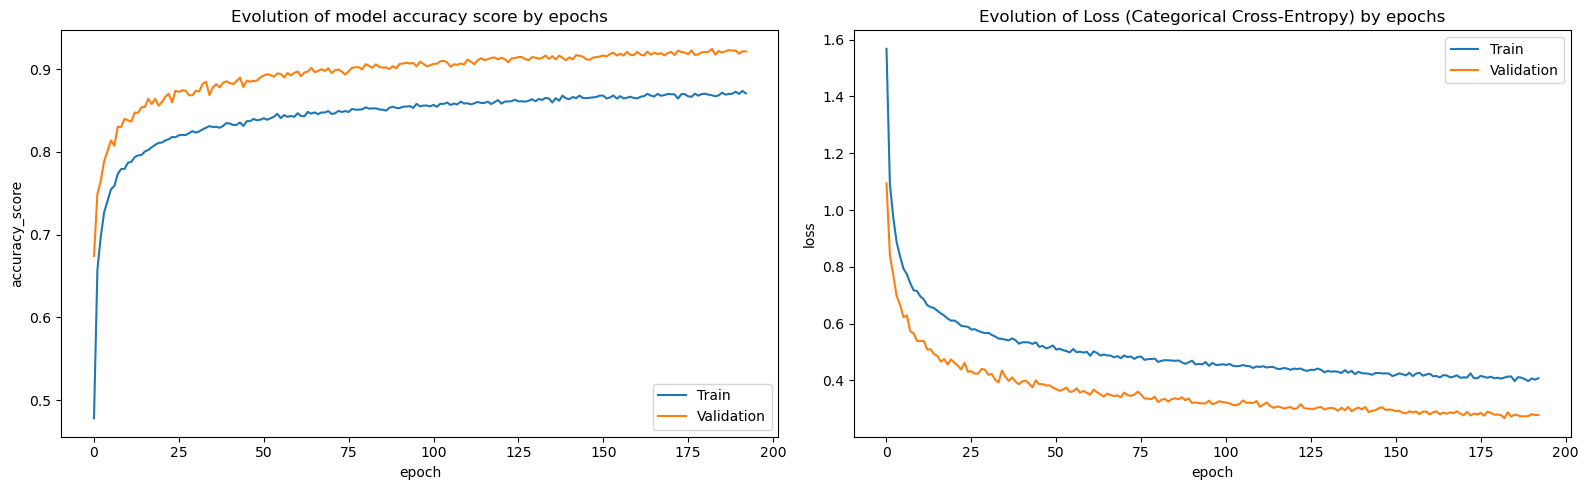

In [277]:
plt.figure(figsize=(16,5))
# History of accuracy score
plt.subplot(1, 2, 1)
plt.plot(hist6.history['accuracy'])
plt.plot(hist6.history['val_accuracy'])
plt.title('Evolution of model accuracy score by epochs')
plt.ylabel('accuracy_score')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
#---------------------------------
# History of Loss
plt.subplot(1, 2, 2)
plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.title('Evolution of Loss (Categorical Cross-Entropy) by epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()

To evaluate the performance of the model, we will use the evaluate() function, which
returns the loss value and metrics values for the model on the test data.

In [278]:
# Obtain cross-entropy loss and accuracy scores on validation dataset
loss, accuracy = model6.evaluate(X_val, y_val_encoded)
print('Validation cross-entropy Loss:', loss)
print('Validation classification Accuracy:', accuracy)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9246
Validation cross-entropy Loss: 0.2665331959724426
Validation classification Accuracy: 0.9245666861534119


In [279]:
# Obtain cross-entropy loss and accuracy scores on test dataset
loss, accuracy = model6.evaluate(X_test, y_test_encoded)
print('Test cross-entropy Loss:', loss)
print('Test classification Accuracy:', accuracy)


563/563 [==============================] - 0s 823us/step - loss: 0.4122 - accuracy: 0.8824
Test cross-entropy Loss: 0.412158727645874
Test classification Accuracy: 0.882444441318512


• With only three hidden layers, dropout layers and batch-normalization applied
after each hidden layer applied, validation accuracy and test accuracy are ~92%
and 88%+ respectively - the best accuracy obtained so far
• Again as before, we have consistent outperformance of classifier on validation
data vs on training data, attributed due to dropout effect
• Notably, validation accuracy is very much stable - i.e., lower the variance in
accuracy and hence higher the confidence in validation accuracy to remain
• The same is reflected through a descent test accuracy of 88%
• Let's play around with optimization algo - try Nadam 

In [289]:
def create_model(numLayers=3,
                 numNeurons=[256,128,64],
                 activation_fn=[tf.keras.layers.LeakyReLU(alpha=0.3)]*3,
                 kernel_initializer=[tf.keras.initializers.glorot_uniform(seed=7)]*3,
                 dropout_rate=[0.20, 0.10, 0.05],
                 output_activation_fn='softmax',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0025)):

 # Initialize sequential Network
 model = tf.keras.Sequential()

 # Reshape the input of 32 x 32 image into 1d array with 1024 features
 model.add(tf.keras.layers.Reshape(target_shape=(1024,), input_shape=(32,32,)))

 # Add batch normalization
 model.add(tf.keras.layers.BatchNormalization())

 if (numLayers==len(numNeurons)) & (numLayers==len(activation_fn)) & (numLayers==len(kernel_initializer)) & (numLayers==len(dropout_rate)):

     # Build hidden layers
     for l in range(numLayers):
         # Add network layers
         model.add(tf.keras.layers.Dense(units=numNeurons[l], activation=activation_fn[l], kernel_initializer=kernel_initializer[l]))

         # Add batch normalization
         model.add(tf.keras.layers.BatchNormalization())

         # Add dropout rates for regularization + avoid overfitting
         model.add(tf.keras.layers.Dropout(rate=dropout_rate[l]))

 # Output Layer with 10 neurons and softmax activation function
 model.add(tf.keras.layers.Dense(units=10, activation=output_activation_fn))

 # Compile model
 model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

 return(model)

In [291]:
# Build NN model and fit on training dataset
model7 = create_model(numLayers=3,
 numNeurons=[256,128,64],
 activation_fn=[tf.keras.layers.LeakyReLU(alpha=0.3)]*3,

kernel_initializer=[tf.keras.initializers.glorot_uniform(seed=7)]*3,
 dropout_rate=[0.20, 0.10, 0.05],
 output_activation_fn='softmax',
 optimizer=tf.keras.optimizers.Nadam())
# Set early stopping criteria (i.e., no improvement in validation loss in 10 successive epochs)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,
restore_best_weights=True, mode='min')
# Train model
hist7 = model7.fit(X_train, y_train_encoded, batch_size=128, epochs=200, verbose=1,
 validation_data=(X_val, y_val_encoded), callbacks=[callback])

Epoch 1/200
329/329 [==============================] - 4s 8ms/step - loss: 1.5367 - accuracy: 0.4981 - val_loss: 1.3148 - val_accuracy: 0.5923
Epoch 2/200
329/329 [==============================] - 3s 8ms/step - loss: 1.0877 - accuracy: 0.6627 - val_loss: 1.1801 - val_accuracy: 0.6333
Epoch 3/200
329/329 [==============================] - 2s 7ms/step - loss: 0.9611 - accuracy: 0.7007 - val_loss: 1.1078 - val_accuracy: 0.6609
Epoch 4/200
329/329 [==============================] - 2s 8ms/step - loss: 0.8897 - accuracy: 0.7256 - val_loss: 0.8284 - val_accuracy: 0.7401
Epoch 5/200
329/329 [==============================] - 2s 7ms/step - loss: 0.8335 - accuracy: 0.7422 - val_loss: 0.7220 - val_accuracy: 0.7786
Epoch 6/200
329/329 [==============================] - 2s 8ms/step - loss: 0.8001 - accuracy: 0.7523 - val_loss: 0.7165 - val_accuracy: 0.7788
Epoch 7/200
329/329 [==============================] - 2s 7ms/step - loss: 0.7664 - accuracy: 0.7612 - val_loss: 0.7463 - val_accuracy: 0.7719

We can plot the training loss, validation loss vs number of epochs and training
accuracy, validation accuracy vs number of epochs using Matplotlib.

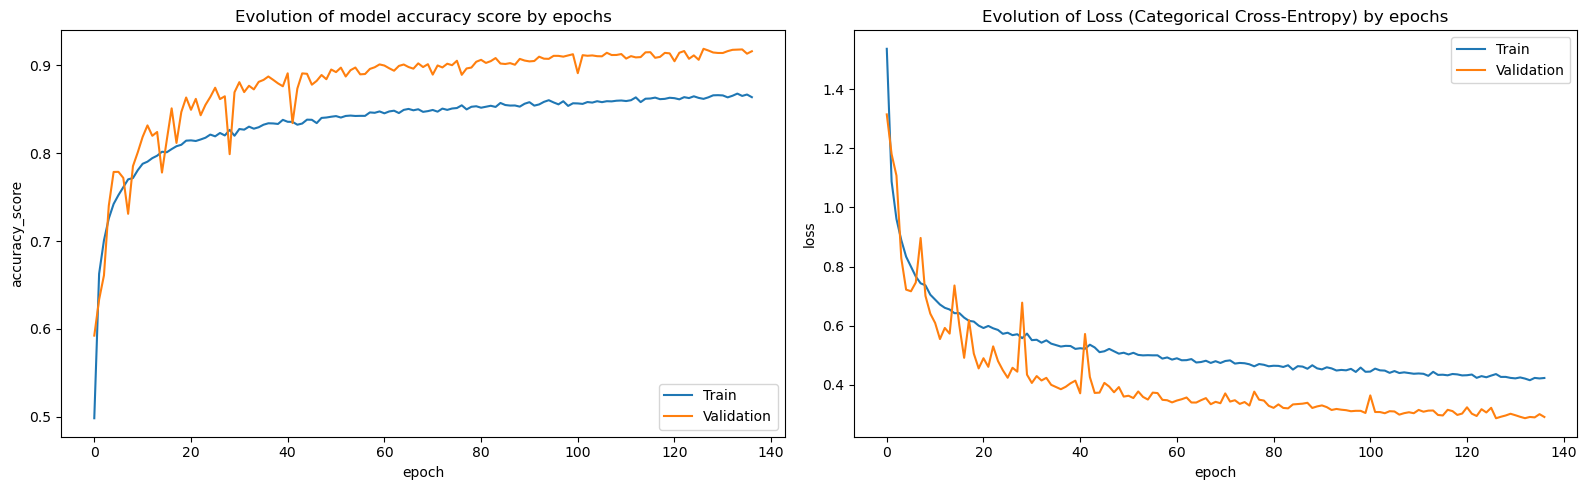

In [292]:
plt.figure(figsize=(16,5))
# History of accuracy score
plt.subplot(1, 2, 1)
plt.plot(hist7.history['accuracy'])
plt.plot(hist7.history['val_accuracy'])
plt.title('Evolution of model accuracy score by epochs')
plt.ylabel('accuracy_score')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
#---------------------------------
# History of Loss
plt.subplot(1, 2, 2)
plt.plot(hist7.history['loss'])
plt.plot(hist7.history['val_loss'])
plt.title('Evolution of Loss (Categorical Cross-Entropy) by epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()


To evaluate the performance of the model, we will use the evaluate() function, which
returns the loss value and metrics values for the model on the test data.

In [293]:
# Obtain cross-entropy loss and accuracy scores on validation dataset
loss, accuracy = model7.evaluate(X_val, y_val_encoded)
print('Validation cross-entropy Loss:', loss)
print('Validation classification Accuracy:', accuracy)


1875/1875 [==============================] - 2s 1ms/step - loss: 0.2869 - accuracy: 0.9189
Validation cross-entropy Loss: 0.286933958530426
Validation classification Accuracy: 0.9189000129699707


In [294]:
# Obtain cross-entropy loss and accuracy scores on test dataset
loss, accuracy = model7.evaluate(X_test, y_test_encoded)
print('Test cross-entropy Loss:', loss)
print('Test classification Accuracy:', accuracy)

563/563 [==============================] - 0s 827us/step - loss: 0.4241 - accuracy: 0.8799
Test cross-entropy Loss: 0.4240877330303192
Test classification Accuracy: 0.8799444437026978


• Validation and Test accuracy scores are ~91% and 87%+ respectively
• Adam optimizer still does touch better vs Nadam
• Since images have noise, we may also want to consider SGD with Nesterov
momentum 

In [298]:
# Build NN model and fit on training dataset
model8 = create_model(numLayers=3,
 numNeurons=[256,128,64],
 activation_fn=[tf.keras.layers.LeakyReLU(alpha=0.3)]*3,

kernel_initializer=[tf.keras.initializers.glorot_uniform(seed=7)]*3,
 dropout_rate=[0.20, 0.10, 0.05],
 output_activation_fn='softmax',
 optimizer=tf.keras.optimizers.SGD(learning_rate=0.005,
momentum=0.9, nesterov=True))
# Set early stopping criteria (i.e., no improvement in validation loss in 10 successive epochs)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,
restore_best_weights=True, mode='min')
# Train model
hist8 = model8.fit(X_train, y_train_encoded, batch_size=128, epochs=200, verbose=1,
 validation_data=(X_val, y_val_encoded), callbacks=[callback])

Epoch 1/200
329/329 [==============================] - 3s 6ms/step - loss: 1.7938 - accuracy: 0.3934 - val_loss: 1.2972 - val_accuracy: 0.6460
Epoch 2/200
329/329 [==============================] - 2s 6ms/step - loss: 1.2233 - accuracy: 0.6093 - val_loss: 0.9701 - val_accuracy: 0.7039
Epoch 3/200
329/329 [==============================] - 2s 6ms/step - loss: 1.0764 - accuracy: 0.6617 - val_loss: 0.8263 - val_accuracy: 0.7520
Epoch 4/200
329/329 [==============================] - 2s 6ms/step - loss: 0.9946 - accuracy: 0.6887 - val_loss: 0.7832 - val_accuracy: 0.7665
Epoch 5/200
329/329 [==============================] - 2s 6ms/step - loss: 0.9378 - accuracy: 0.7082 - val_loss: 0.7545 - val_accuracy: 0.7733
Epoch 6/200
329/329 [==============================] - 2s 6ms/step - loss: 0.8997 - accuracy: 0.7196 - val_loss: 0.7062 - val_accuracy: 0.7891
Epoch 7/200
329/329 [==============================] - 2s 6ms/step - loss: 0.8525 - accuracy: 0.7347 - val_loss: 0.6799 - val_accuracy: 0.7964

We can plot the training loss, validation loss vs number of epochs and training
accuracy, validation accuracy vs number of epochs using Matplotlib.

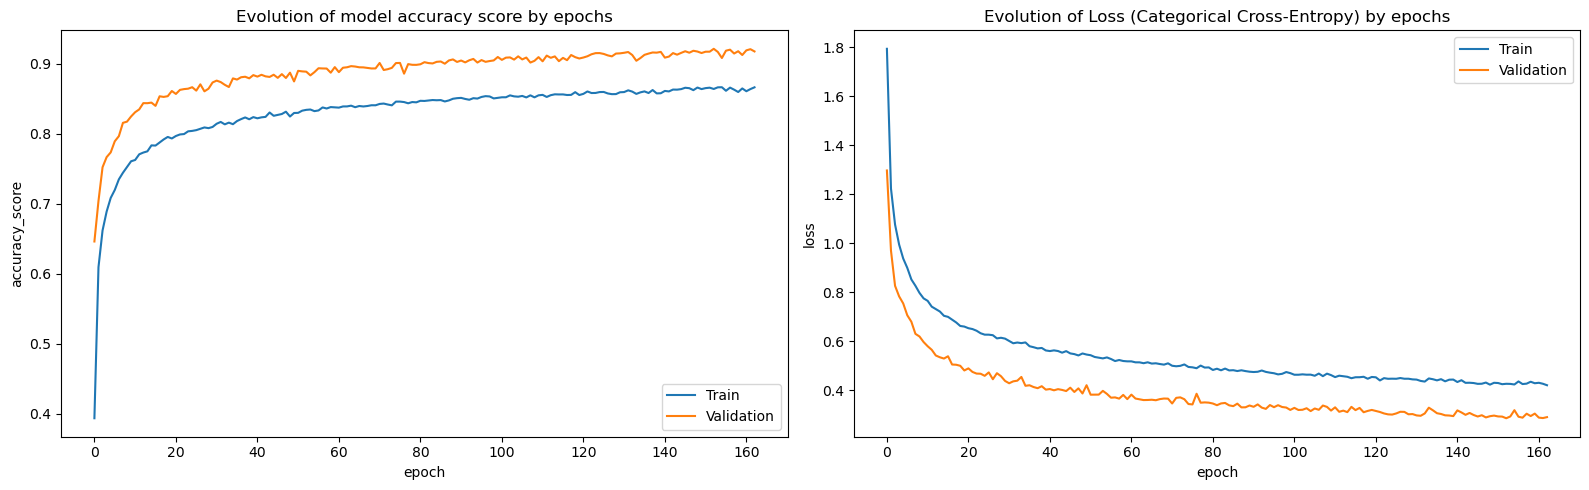

In [299]:
plt.figure(figsize=(16,5))
# History of accuracy score
plt.subplot(1, 2, 1)
plt.plot(hist8.history['accuracy'])
plt.plot(hist8.history['val_accuracy'])
plt.title('Evolution of model accuracy score by epochs')
plt.ylabel('accuracy_score')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
#---------------------------------
# History of Loss
plt.subplot(1, 2, 2)
plt.plot(hist8.history['loss'])
plt.plot(hist8.history['val_loss'])
plt.title('Evolution of Loss (Categorical Cross-Entropy) by epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()

In [300]:
# Obtain cross-entropy loss and accuracy scores on validation dataset
loss, accuracy = model8.evaluate(X_val, y_val_encoded)
print('Validation cross-entropy Loss:', loss)
print('Validation classification Accuracy:', accuracy)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2859 - accuracy: 0.9213
Validation cross-entropy Loss: 0.2858662009239197
Validation classification Accuracy: 0.9212666749954224


To evaluate the performance of the model, we will use the evaluate() function, which
returns the loss value and metrics values for the model on the test data.

In [301]:
# Obtain cross-entropy loss and accuracy scores on test dataset
loss, accuracy = model8.evaluate(X_test, y_test_encoded)
print('Test cross-entropy Loss:', loss)
print('Test classification Accuracy:', accuracy)

563/563 [==============================] - 0s 825us/step - loss: 0.4328 - accuracy: 0.8771
Test cross-entropy Loss: 0.4328251779079437
Test classification Accuracy: 0.8770555257797241


Again we have fairly good accuracy in both validation and test datasets for SGD
with Nesterov momentum  
• Validation accuracy ~92% and Test accuracy of ~87.5%  
• However, Adam still beats SGD optimizer in terms of both min loss and max
accuracy  
• I tried RMSProp too and found Adam to be the best still  
• I finalize the best model having validation accuracy of 91.85% (loss: 28.61%),
and test accuracy of 88.08% (loss: 41.99%)  
• Model specification: Neural Net with three hidden layers, with batch
normalization and dropout layers applied after each hidden layer, hidden layer
activation function as Leaky ReLU with alpha = 0.3, optimizer being Adam with
learning rate 0.0025, model evaluated using softmax activation function in the
output layer along with categorical cross-entropy as loss function   

Model evaluation¶


In [302]:
# Store the best model
best_model = model6

In [303]:
# Prepare target data for model evaluation
y_test_actual = np.argmax(y_test_encoded, axis=1)
y_test_pred = np.argmax(best_model.predict(X_test), axis=1)

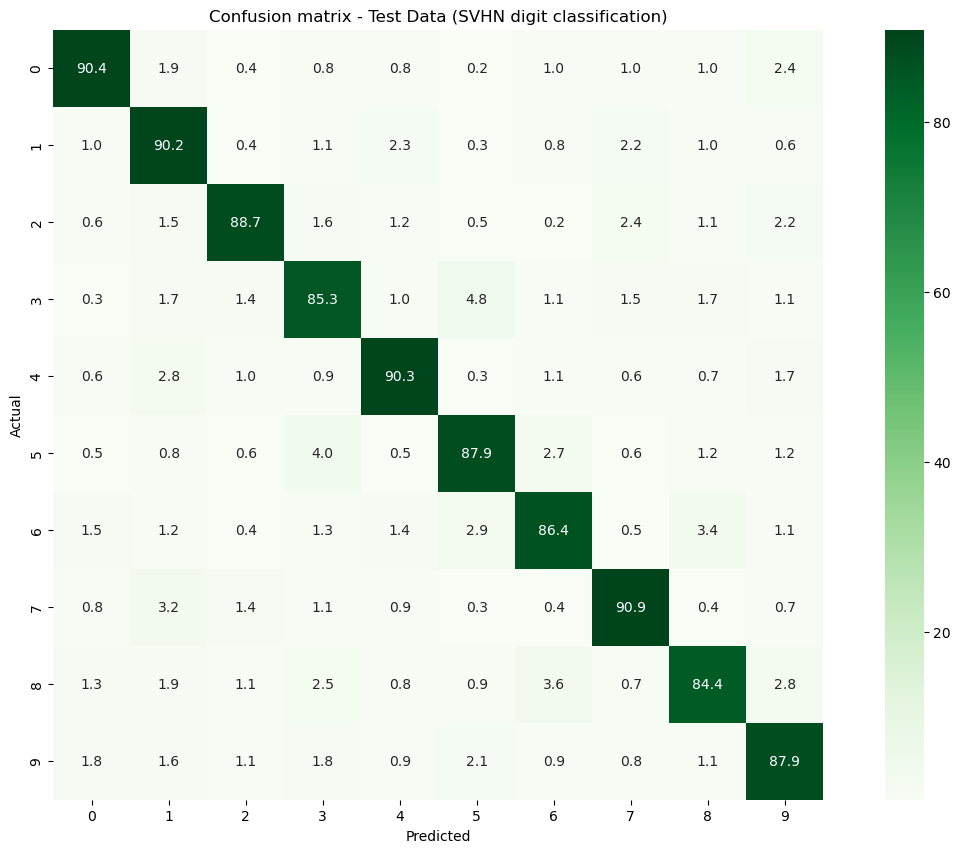

In [304]:
# Set the figure size
plt.figure(figsize=(16, 10))
# Calculate the confusion matrix
cm = confusion_matrix(y_true=y_test_actual, y_pred=y_test_pred)
# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100.0
# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Greens', fmt='.1f', square=True)\
.set_title('Confusion matrix - Test Data (SVHN digit classification)')
_ = plt.xlabel('Predicted')
_ = plt.ylabel('Actual')

Comments on confusion matrix above:  
• Digits 0, 4 and 7 are classified most accurately (92.1%, 90.8% and 90.3%
respectively)  
• Digits 8, 6, 3 and 9 are classified not so accurately - this is clearly evident from
the fact that digits 8, 6, 3 and 9 have very similar turns and edges  
• Digit prediction accuracy scores for SVHN using DNN range from 84.3% to 92.1%  


In [305]:
# Print the classification report
print(classification_report(y_test_actual, y_test_pred))


              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1814
           1       0.85      0.90      0.87      1828
           2       0.92      0.89      0.90      1803
           3       0.84      0.85      0.85      1719
           4       0.90      0.90      0.90      1812
           5       0.88      0.88      0.88      1768
           6       0.88      0.86      0.87      1832
           7       0.90      0.91      0.90      1808
           8       0.88      0.84      0.86      1812
           9       0.86      0.88      0.87      1804

    accuracy                           0.88     18000
   macro avg       0.88      0.88      0.88     18000
weighted avg       0.88      0.88      0.88     18000



Looking at the f1-scores, digits 7, 0 and 2 are classified most accurately  
Conclusion:  
• ANN / DNN predicts image classification based on distribution of image pixel
intensities  
• The dataset in hand is of SVHN image - and, hence the images contain lots of
noise and is hard to discern simply by looking at the pixel intensities  
• The best ANN model has validation accuracy score of ~92%; while the same
model achieved test accuracy score of 88%  
• Whatever the best DNN model you apply, in case the source image contains lot
of blurriness / noise, you can't get very high accuracy unless you have
technology to detect the edges of the images.  
• I think CNN is a better candidate technology for SVHN image classification
problem given its inherent complexity.   

In [310]:
# Prepare model and fitting parameters ... [for future tests in Grid Search CV for Neural Nets]
#mdl = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model
# , verbose=0
# , validation_data=(X_val, y_val_encoded)
# , callbacks=[callback]
# )
# **********************************************************
#batch_size=[64, 128]
#epochs=[100,150,200]
#activation_fn=[[tf.keras.layers.LeakyReLU(alpha=0.3)]*3, ['relu']*3, ['tanh']*3, ['sigmoid']*3]
#optimizer = [tf.keras.optimizers.Adam(learning_rate=0.0025),
# tf.keras.optimizers.Nadam(learning_rate=0.0025),
# tf.keras.optimizers.RMSprop(learning_rate=0.0025),
# tf.keras.optimizers.SGD(learning_rate=0.0025, nesterov=True)] #'Adagrad', 'Adadelta', 'Adamax'
#param_grid = dict(batch_size=batch_size, epochs=epochs, activation_fn=activation_fn, optimizer=optimizer)
#from sklearn.model_selection import GridSearchCV
#grid = GridSearchCV(estimator=mdl, param_grid=param_grid, n_jobs=-1, cv=3)
#grid_result = grid.fit(X_train, y_train_encoded)
# ***********************************************************
# summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
# print("%f (%f) with: %r" % (mean, stdev, param))